In [2]:
# First part - data processing

In [3]:
# 1. Proper data loading

In [4]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Load dataset
dataset = pd.read_csv('Loan_data.csv', low_memory=False)

In [6]:
dataset

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501        NaN     5000.0       5000.0           4975.0   
1      1077430        NaN     2500.0       2500.0           2500.0   
2      1077175        NaN     2400.0       2400.0           2400.0   
3      1076863        NaN    10000.0      10000.0          10000.0   
4      1075358        NaN     3000.0       3000.0           3000.0   
...        ...        ...        ...          ...              ...   
42531    73582        NaN     3500.0       3500.0            225.0   
42532    72998        NaN     1000.0       1000.0              0.0   
42533    72176        NaN     2525.0       2525.0            225.0   
42534    71623        NaN     6500.0       6500.0              0.0   
42535    70686        NaN     5000.0       5000.0              0.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
3       36 months   13.49%       339.31     C        C1  ...   
4       60 months   12.69%        67.79     B        B5  ...   
...           ...      ...          ...   ...       ...  ...   
42531   36 months   10.28%       113.39     C        C1  ...   
42532   36 months    9.64%        32.11     B        B4  ...   
42533   36 months    9.33%        80.69     B        B3  ...   
42534   36 months    8.38%       204.84     A        A5  ...   
42535   36 months    7.75%       156.11     A        A3  ...   

      hardship_payoff_balance_amount hardship_last_payment_amount  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2                                NaN                          NaN   
3                                NaN                          NaN   
4                                NaN                          NaN   
...                              ...                          ...   
42531                            NaN                          NaN   
42532                            NaN                          NaN   
42533                            NaN                          NaN   
42534                            NaN                          NaN   
42535                            NaN                          NaN   

      disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                    Cash                     N                       NaN   
1                    Cash                     N                       NaN   
2                    Cash                     N                       NaN   
3                    Cash                     N                       NaN   
4                    Cash                     N                       NaN   
...                   ...                   ...                       ...   
42531                Cash                     N                       NaN   
42532                Cash                     N                       NaN   
42533                Cash                     N                       NaN   
42534                Cash                     N                       NaN   
42535                Cash                     N                       NaN   

      settlement_status settlement_date settlement_amount  \
0                   NaN             NaN               NaN   
1                   NaN             NaN               NaN   
2                   NaN             NaN               NaN   
3                   NaN             NaN               NaN   
4                   NaN             NaN               NaN   
...                 ...             ...               ...   
42531               NaN             NaN               NaN   
42532               NaN             NaN               NaN   
42533               NaN             NaN               NaN   
42534               NaN             Na

In [7]:
# Our dataset contains almost 43k rows and 151 columns.

In [8]:
# 2. Removing future data

In [9]:
# To do this step we have to analyse some columns and its description. Let's create a list of columns which we'd like
# to remove from further processing.

In [10]:
# This columns are unavailable when we'd like to take a loan
columns_to_remove = [
    'total_rec_prncp',
    'last_credit_pull_d',
    'total_pymnt_inv',
    'last_pymnt_amnt',
    'total_rec_int',
    'total_pymnt',
    'last_pymnt_d',
    'settlement_term',
    'settlement_status',
    'settlement_date',
    'settlement_amount',
    'settlement_percentage',
    'collection_recovery_fee',
    'issue_d',
    'total_rec_late_fee',
    'recoveries',
    'dti'
]

In [11]:
# Remove columns
dataset = dataset.drop(columns=columns_to_remove)

In [12]:
# After removing
dataset

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501        NaN     5000.0       5000.0           4975.0   
1      1077430        NaN     2500.0       2500.0           2500.0   
2      1077175        NaN     2400.0       2400.0           2400.0   
3      1076863        NaN    10000.0      10000.0          10000.0   
4      1075358        NaN     3000.0       3000.0           3000.0   
...        ...        ...        ...          ...              ...   
42531    73582        NaN     3500.0       3500.0            225.0   
42532    72998        NaN     1000.0       1000.0              0.0   
42533    72176        NaN     2525.0       2525.0            225.0   
42534    71623        NaN     6500.0       6500.0              0.0   
42535    70686        NaN     5000.0       5000.0              0.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
3       36 months   13.49%       339.31     C        C1  ...   
4       60 months   12.69%        67.79     B        B5  ...   
...           ...      ...          ...   ...       ...  ...   
42531   36 months   10.28%       113.39     C        C1  ...   
42532   36 months    9.64%        32.11     B        B4  ...   
42533   36 months    9.33%        80.69     B        B3  ...   
42534   36 months    8.38%       204.84     A        A5  ...   
42535   36 months    7.75%       156.11     A        A3  ...   

      payment_plan_start_date hardship_length hardship_dpd  \
0                         NaN             NaN          NaN   
1                         NaN             NaN          NaN   
2                         NaN             NaN          NaN   
3                         NaN             NaN          NaN   
4                         NaN             NaN          NaN   
...                       ...             ...          ...   
42531                     NaN             NaN          NaN   
42532                     NaN             NaN          NaN   
42533                     NaN             NaN          NaN   
42534                     NaN             NaN          NaN   
42535                     NaN             NaN          NaN   

       hardship_loan_status orig_projected_additional_accrued_interest  \
0                       NaN                                        NaN   
1                       NaN                                        NaN   
2                       NaN                                        NaN   
3                       NaN                                        NaN   
4                       NaN                                        NaN   
...                     ...                                        ...   
42531                   NaN                                        NaN   
42532                   NaN                                        NaN   
42533                   NaN                                        NaN   
42534                   NaN                                        NaN   
42535                   NaN                                        NaN   

      hardship_payoff_balance_amount hardship_last_payment_amount  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2                                NaN                          NaN   
3                                NaN                          NaN   
4                                NaN                          NaN   
...                              ...                          ...   
42531                            NaN                          NaN   
42532                            NaN                          NaN   
42533                            NaN                          NaN   
42534                            NaN                          NaN   
42535    

In [13]:
# 3. Removing unuseful columns

<AxesSubplot:>

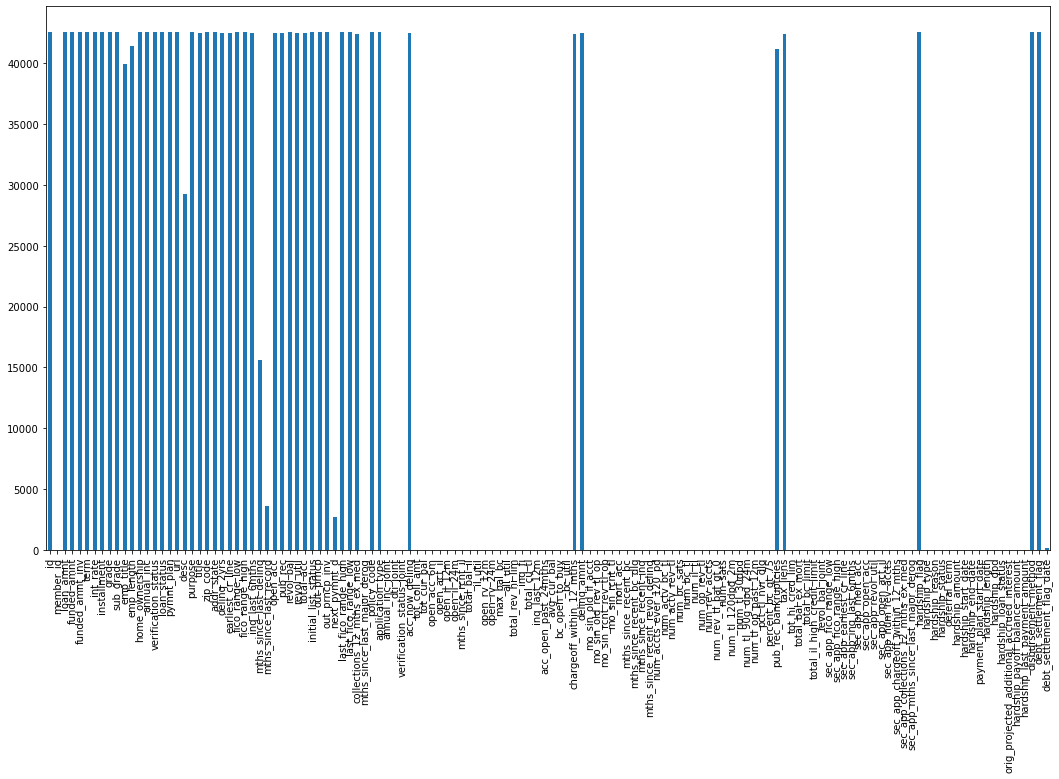

In [14]:
plt.figure(figsize=(18, 10))
dataset.count().plot(kind = 'bar')

In [15]:
# We can observem that some columns have zero values or really small amount in comparison to others. Let's just 
# remove this one, which fill is lower than 80% of dataframe.

In [16]:
# Let's calculate 90%
int(0.9 * len(dataset))

38282

In [17]:
# Nan values can be only 10% of data - maximum
to_remove = [col for col in dataset.columns if dataset[col].isna().sum() > int(0.1 * len(dataset))]

In [18]:
to_remove

['member_id',
 'desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',

In [19]:
# Remove columns
dataset = dataset.drop(columns=to_remove)

<AxesSubplot:>

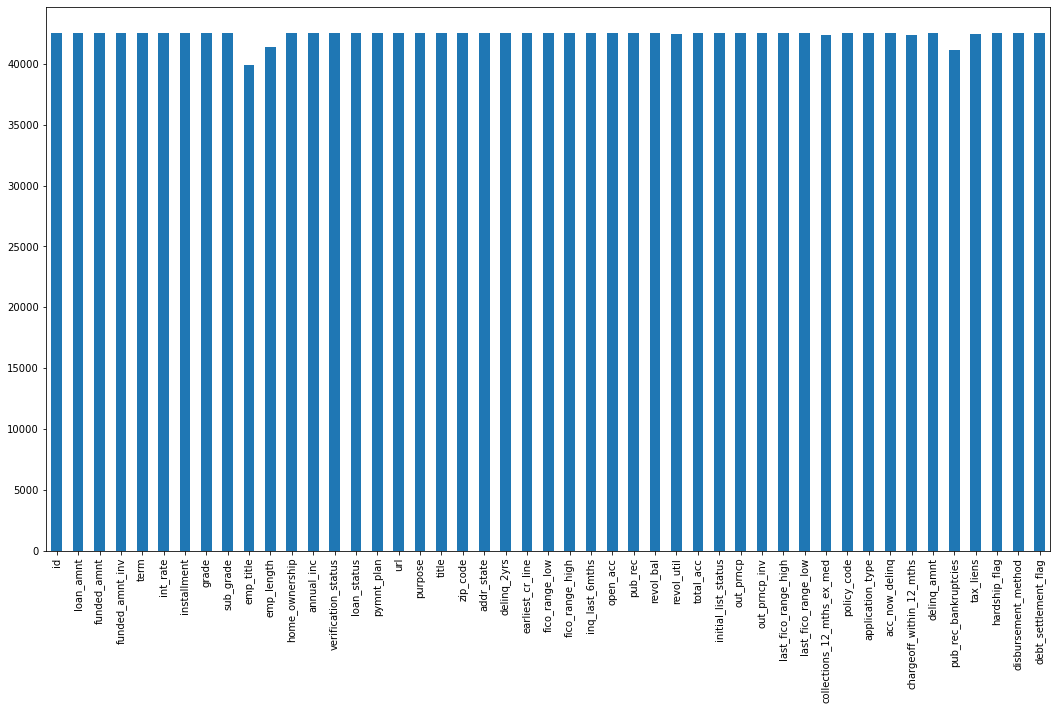

In [20]:
plt.figure(figsize=(18, 10))
dataset.count().plot(kind = 'bar')

In [21]:
# 4. Removing columns with only one unique value

In [22]:
# Get columns with one unique value
to_remove = [col for col in dataset.columns if len(dataset[col].value_counts()) == 1]

In [23]:
to_remove

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'chargeoff_within_12_mths',
 'hardship_flag',
 'disbursement_method']

In [24]:
# Remove columns with only one unique value
dataset = dataset.drop(columns=to_remove)

In [25]:
# 5. Loan status column analysis

In [26]:
dataset['loan_status']

0                                               Fully Paid
1                                              Charged Off
2                                               Fully Paid
3                                               Fully Paid
4                                               Fully Paid
                               ...                        
42531    Does not meet the credit policy. Status:Fully ...
42532    Does not meet the credit policy. Status:Fully ...
42533    Does not meet the credit policy. Status:Fully ...
42534    Does not meet the credit policy. Status:Fully ...
42535    Does not meet the credit policy. Status:Fully ...
Name: loan_status, Length: 42536, dtype: object

In [27]:
dataset['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [28]:
# We have a lot of Fully Paid (about 80% of all dataset)

In [29]:
# 6. Column processing (removing %, additional signs and more)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    42536 non-null  object 
 1   loan_amnt             42535 non-null  float64
 2   funded_amnt           42535 non-null  float64
 3   funded_amnt_inv       42535 non-null  float64
 4   term                  42535 non-null  object 
 5   int_rate              42535 non-null  object 
 6   installment           42535 non-null  float64
 7   grade                 42535 non-null  object 
 8   sub_grade             42535 non-null  object 
 9   emp_title             39909 non-null  object 
 10  emp_length            41423 non-null  object 
 11  home_ownership        42535 non-null  object 
 12  annual_inc            42531 non-null  float64
 13  verification_status   42535 non-null  object 
 14  loan_status           42535 non-null  object 
 15  url                

In [31]:
# We have a lot of object columns - we have to deal with it, but let's get familiar with all columns sequentially.

In [32]:
# id column - let's remove it - not important

In [33]:
to_remove = ['id']

In [34]:
# loan_amnt
dataset['loan_amnt']

0         5000.0
1         2500.0
2         2400.0
3        10000.0
4         3000.0
          ...   
42531     3500.0
42532     1000.0
42533     2525.0
42534     6500.0
42535     5000.0
Name: loan_amnt, Length: 42536, dtype: float64

In [35]:
# This column is ok.

In [36]:
# funded_amnt - ok

In [37]:
dataset['funded_amnt']

0         5000.0
1         2500.0
2         2400.0
3        10000.0
4         3000.0
          ...   
42531     3500.0
42532     1000.0
42533     2525.0
42534     6500.0
42535     5000.0
Name: funded_amnt, Length: 42536, dtype: float64

In [38]:
# funded_amnt_inv - ok

In [39]:
dataset['funded_amnt_inv']

0         4975.0
1         2500.0
2         2400.0
3        10000.0
4         3000.0
          ...   
42531      225.0
42532        0.0
42533      225.0
42534        0.0
42535        0.0
Name: funded_amnt_inv, Length: 42536, dtype: float64

In [40]:
# Term
dataset['term']

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
42531     36 months
42532     36 months
42533     36 months
42534     36 months
42535     36 months
Name: term, Length: 42536, dtype: object

In [41]:
# We have to remove months and convert to integer

In [42]:
dataset['term'] = dataset['term'].apply(lambda x: int(x.replace('months', '')) if 'months' in str(x) else x)

In [43]:
# int_rate
dataset['int_rate']

0         10.65%
1         15.27%
2         15.96%
3         13.49%
4         12.69%
          ...   
42531     10.28%
42532      9.64%
42533      9.33%
42534      8.38%
42535      7.75%
Name: int_rate, Length: 42536, dtype: object

In [44]:
# Remove %
dataset['int_rate'] = dataset['int_rate'].apply(lambda x: float(x.replace('%', '').replace(',', '.')) if '%' in str(x) else x)

In [45]:
dataset['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
42531    10.28
42532     9.64
42533     9.33
42534     8.38
42535     7.75
Name: int_rate, Length: 42536, dtype: float64

In [46]:
# installment - ok

In [47]:
dataset['installment']

0        162.87
1         59.83
2         84.33
3        339.31
4         67.79
          ...  
42531    113.39
42532     32.11
42533     80.69
42534    204.84
42535    156.11
Name: installment, Length: 42536, dtype: float64

In [48]:
# grade - OHE (one hot encoding)
dataset['grade']

0        B
1        C
2        C
3        C
4        B
        ..
42531    C
42532    B
42533    B
42534    A
42535    A
Name: grade, Length: 42536, dtype: object

In [49]:
# sub_grade
dataset['sub_grade'] 

0        B2
1        C4
2        C5
3        C1
4        B5
         ..
42531    C1
42532    B4
42533    B3
42534    A5
42535    A3
Name: sub_grade, Length: 42536, dtype: object

In [50]:
# Remove it
to_remove.append('sub_grade')

In [51]:
dataset['emp_title']

0                               NaN
1                             Ryder
2                               NaN
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
42531                           NaN
42532    Halping hands company inc.
42533                           NaN
42534                           NaN
42535                     Homemaker
Name: emp_title, Length: 42536, dtype: object

In [52]:
# Remove it
to_remove.append('emp_title')

In [53]:
# emp_length
dataset['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
42531     < 1 year
42532     < 1 year
42533     < 1 year
42534     < 1 year
42535    10+ years
Name: emp_length, Length: 42536, dtype: object

In [54]:
dataset['emp_length'] = dataset['emp_length'].apply(lambda x: x.replace(" years","").replace(" year","").replace("<","").replace("+","") if isinstance(x, str) else x)

In [55]:
dataset['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
42531     1
42532     1
42533     1
42534     1
42535    10
Name: emp_length, Length: 42536, dtype: object

In [56]:
# To float
dataset['emp_length'] = dataset['emp_length'].astype(float)

In [57]:
# home_ownership - ok
dataset['home_ownership']

0            RENT
1            RENT
2            RENT
3            RENT
4            RENT
           ...   
42531        RENT
42532        RENT
42533        RENT
42534        NONE
42535    MORTGAGE
Name: home_ownership, Length: 42536, dtype: object

In [58]:
# annual_inc - ok
dataset['annual_inc']

0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
42531    180000.0
42532     12000.0
42533    110000.0
42534         NaN
42535     70000.0
Name: annual_inc, Length: 42536, dtype: float64

In [59]:
# verification_status - ok
dataset['verification_status']

0               Verified
1        Source Verified
2           Not Verified
3        Source Verified
4        Source Verified
              ...       
42531       Not Verified
42532       Not Verified
42533       Not Verified
42534       Not Verified
42535       Not Verified
Name: verification_status, Length: 42536, dtype: object

In [60]:
# loan_status - of course ok -> target
dataset['loan_status']

0                                               Fully Paid
1                                              Charged Off
2                                               Fully Paid
3                                               Fully Paid
4                                               Fully Paid
                               ...                        
42531    Does not meet the credit policy. Status:Fully ...
42532    Does not meet the credit policy. Status:Fully ...
42533    Does not meet the credit policy. Status:Fully ...
42534    Does not meet the credit policy. Status:Fully ...
42535    Does not meet the credit policy. Status:Fully ...
Name: loan_status, Length: 42536, dtype: object

In [61]:
# url - not useful - remove
dataset['url']

0        https://lendingclub.com/browse/loanDetail.acti...
1        https://lendingclub.com/browse/loanDetail.acti...
2        https://lendingclub.com/browse/loanDetail.acti...
3        https://lendingclub.com/browse/loanDetail.acti...
4        https://lendingclub.com/browse/loanDetail.acti...
                               ...                        
42531    https://lendingclub.com/browse/loanDetail.acti...
42532    https://lendingclub.com/browse/loanDetail.acti...
42533    https://lendingclub.com/browse/loanDetail.acti...
42534    https://lendingclub.com/browse/loanDetail.acti...
42535    https://lendingclub.com/browse/loanDetail.acti...
Name: url, Length: 42536, dtype: object

In [62]:
to_remove.append('url')

In [63]:
dataset['purpose'] # ok

0           credit_card
1                   car
2        small_business
3                 other
4                 other
              ...      
42531             other
42532             other
42533             other
42534             other
42535             other
Name: purpose, Length: 42536, dtype: object

In [64]:
# title - ok, maybe will be used for new feature
dataset['title']

0                    Computer
1                        bike
2        real estate business
3                    personel
4                    Personal
                 ...         
42531       Wedding coming up
42532                 delight
42533         Car repair bill
42534            Buying a car
42535          Aroundthehouse
Name: title, Length: 42536, dtype: object

In [65]:
# zip_code - let's remove
dataset['zip_code']

0        860xx
1        309xx
2        606xx
3        917xx
4        972xx
         ...  
42531    100xx
42532    021xx
42533    100xx
42534    100xx
42535    068xx
Name: zip_code, Length: 42536, dtype: object

In [66]:
to_remove.append('zip_code')

In [67]:
dataset['addr_state'] # may be useful

0        AZ
1        GA
2        IL
3        CA
4        OR
         ..
42531    NY
42532    MA
42533    NY
42534    NY
42535    CT
Name: addr_state, Length: 42536, dtype: object

In [68]:
dataset['delinq_2yrs'] # ok

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
42531    NaN
42532    NaN
42533    NaN
42534    NaN
42535    NaN
Name: delinq_2yrs, Length: 42536, dtype: float64

In [69]:
dataset['earliest_cr_line'] # ok

0        Jan-1985
1        Apr-1999
2        Nov-2001
3        Feb-1996
4        Jan-1996
           ...   
42531         NaN
42532         NaN
42533         NaN
42534         NaN
42535         NaN
Name: earliest_cr_line, Length: 42536, dtype: object

In [70]:
dataset['fico_range_low'] # ok

0        735.0
1        740.0
2        735.0
3        690.0
4        695.0
         ...  
42531    685.0
42532    695.0
42533    710.0
42534    740.0
42535    770.0
Name: fico_range_low, Length: 42536, dtype: float64

In [71]:
dataset['fico_range_high'] # ok

0        739.0
1        744.0
2        739.0
3        694.0
4        699.0
         ...  
42531    689.0
42532    699.0
42533    714.0
42534    744.0
42535    774.0
Name: fico_range_high, Length: 42536, dtype: float64

In [72]:
dataset['inq_last_6mths'] # ok

0        1.0
1        5.0
2        2.0
3        1.0
4        0.0
        ... 
42531    NaN
42532    NaN
42533    NaN
42534    NaN
42535    NaN
Name: inq_last_6mths, Length: 42536, dtype: float64

In [73]:
dataset['open_acc'] # ok

0         3.0
1         3.0
2         2.0
3        10.0
4        15.0
         ... 
42531     NaN
42532     NaN
42533     NaN
42534     NaN
42535     NaN
Name: open_acc, Length: 42536, dtype: float64

In [74]:
dataset['pub_rec'] # ok

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
42531    NaN
42532    NaN
42533    NaN
42534    NaN
42535    NaN
Name: pub_rec, Length: 42536, dtype: float64

In [75]:
dataset['revol_bal'] # ok

0        13648.0
1         1687.0
2         2956.0
3         5598.0
4        27783.0
          ...   
42531        0.0
42532        0.0
42533        0.0
42534        0.0
42535        0.0
Name: revol_bal, Length: 42536, dtype: float64

In [76]:
dataset['revol_util'] # We have to remove %

0        83.7%
1         9.4%
2        98.5%
3          21%
4        53.9%
         ...  
42531      NaN
42532      NaN
42533      NaN
42534      NaN
42535      NaN
Name: revol_util, Length: 42536, dtype: object

In [77]:
dataset['revol_util'] = dataset['revol_util'].apply(lambda x: float(x.replace('%', '').replace(',', '.')) if '%' in str(x) else x)

In [78]:
dataset['revol_util']

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
42531     NaN
42532     NaN
42533     NaN
42534     NaN
42535     NaN
Name: revol_util, Length: 42536, dtype: float64

In [79]:
dataset['total_acc'] # ok

0         9.0
1         4.0
2        10.0
3        37.0
4        38.0
         ... 
42531     NaN
42532     NaN
42533     NaN
42534     NaN
42535     NaN
Name: total_acc, Length: 42536, dtype: float64

In [80]:
dataset['last_fico_range_high'] # ok

0        739.0
1        499.0
2        739.0
3        604.0
4        684.0
         ...  
42531    819.0
42532    784.0
42533    714.0
42534    724.0
42535    794.0
Name: last_fico_range_high, Length: 42536, dtype: float64

In [81]:
dataset['last_fico_range_low'] # ok

0        735.0
1          0.0
2        735.0
3        600.0
4        680.0
         ...  
42531    815.0
42532    780.0
42533    710.0
42534    720.0
42535    790.0
Name: last_fico_range_low, Length: 42536, dtype: float64

In [82]:
dataset['acc_now_delinq'].value_counts()

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64

In [83]:
# Remove 
to_remove.append('acc_now_delinq')

In [84]:
dataset['delinq_amnt'].value_counts() # ok

0.0       42504
27.0          1
6053.0        1
Name: delinq_amnt, dtype: int64

In [85]:
# Remove 
to_remove.append('delinq_amnt')

In [86]:
dataset['pub_rec_bankruptcies'].value_counts() # ok

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [87]:
dataset['tax_liens'].value_counts()

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

In [88]:
# Remove 
to_remove.append('tax_liens')

In [89]:
dataset['debt_settlement_flag'].value_counts() # ok

N    42375
Y      160
Name: debt_settlement_flag, dtype: int64

In [90]:
dataset = dataset.drop(columns=to_remove)

In [91]:
dataset

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0         5000.0       5000.0           4975.0  36.0     10.65       162.87   
1         2500.0       2500.0           2500.0  60.0     15.27        59.83   
2         2400.0       2400.0           2400.0  36.0     15.96        84.33   
3        10000.0      10000.0          10000.0  36.0     13.49       339.31   
4         3000.0       3000.0           3000.0  60.0     12.69        67.79   
...          ...          ...              ...   ...       ...          ...   
42531     3500.0       3500.0            225.0  36.0     10.28       113.39   
42532     1000.0       1000.0              0.0  36.0      9.64        32.11   
42533     2525.0       2525.0            225.0  36.0      9.33        80.69   
42534     6500.0       6500.0              0.0  36.0      8.38       204.84   
42535     5000.0       5000.0              0.0  36.0      7.75       156.11   

      grade  emp_length home_ownership  annual_inc  ... inq_last_6mths  \
0         B        10.0           RENT     24000.0  ...            1.0   
1         C         1.0           RENT     30000.0  ...            5.0   
2         C        10.0           RENT     12252.0  ...            2.0   
3         C        10.0           RENT     49200.0  ...            1.0   
4         B         1.0           RENT     80000.0  ...            0.0   
...     ...         ...            ...         ...  ...            ...   
42531     C         1.0           RENT    180000.0  ...            NaN   
42532     B         1.0           RENT     12000.0  ...            NaN   
42533     B         1.0           RENT    110000.0  ...            NaN   
42534     A         1.0           NONE         NaN  ...            NaN   
42535     A        10.0       MORTGAGE     70000.0  ...            NaN   

      open_acc pub_rec revol_bal revol_util  total_acc last_fico_range_high  \
0          3.0     0.0   13648.0       83.7        9.0                739.0   
1          3.0     0.0    1687.0        9.4        4.0                499.0   
2          2.0     0.0    2956.0       98.5       10.0                739.0   
3         10.0     0.0    5598.0       21.0       37.0                604.0   
4         15.0     0.0   27783.0       53.9       38.0                684.0   
...        ...     ...       ...        ...        ...                  ...   
42531      NaN     NaN       0.0        NaN        NaN                819.0   
42532      NaN     NaN       0.0        NaN        NaN                784.0   
42533      NaN     NaN       0.0        NaN        NaN                714.0   
42534      NaN     NaN       0.0        NaN        NaN                724.0   
42535      NaN     NaN       0.0        NaN        NaN                794.0   

       last_fico_range_low  pub_rec_bankruptcies  debt_settlement_flag  
0                    735.0                   0.0                     N  
1                      0.0                   0.0                     N  
2                    735.0                   0.0                     N  
3                    600.0                   0.0                     N  
4                    680.0                   0.0                     N  
...                    ...                   ...                   ...  
42531                815.0                   NaN                     N  
42532                780.0                   NaN                     N  
42533                710.0                   NaN                     N  
42534                720.0                   NaN                     N  
42535                790.0                   NaN                     N  

[42536 rows x 29 columns]

In [92]:
# 7. Missing values analysis

In [93]:
dataset.isna().sum()

loan_amnt                  1
funded_amnt                1
funded_amnt_inv            1
term                       1
int_rate                   1
installment                1
grade                      1
emp_length              1113
home_ownership             1
annual_inc                 5
verification_status        1
loan_status                1
purpose                    1
title                     14
addr_state                 1
delinq_2yrs               30
earliest_cr_line          30
fico_range_low             1
fico_range_high            1
inq_last_6mths            30
open_acc                  30
pub_rec                   30
revol_bal                  1
revol_util                91
total_acc                 30
last_fico_range_high       1
last_fico_range_low        1
pub_rec_bankruptcies    1366
debt_settlement_flag       1
dtype: int64

In [94]:
# Remove loan_amnt and other columns with no way of filling (too many different values)
dataset = dataset.dropna(subset=['loan_amnt', 'annual_inc', 'title', 'earliest_cr_line', 'revol_util'])

In [95]:
dataset.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1108
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                      0
addr_state                 0
delinq_2yrs                0
earliest_cr_line           0
fico_range_low             0
fico_range_high            0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
last_fico_range_high       0
last_fico_range_low        0
pub_rec_bankruptcies    1333
debt_settlement_flag       0
dtype: int64

In [96]:
# Now let's focus on emp_length 

In [97]:
dataset['emp_length'].value_counts()

10.0    9363
1.0     8611
2.0     4736
3.0     4358
4.0     3638
5.0     3451
6.0     2369
7.0     1871
8.0     1589
9.0     1338
Name: emp_length, dtype: int64

In [98]:
# Let's fill it with ffill

In [99]:
dataset['emp_length'] = dataset['emp_length'].ffill()

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
dataset.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                      0
addr_state                 0
delinq_2yrs                0
earliest_cr_line           0
fico_range_low             0
fico_range_high            0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
last_fico_range_high       0
last_fico_range_low        0
pub_rec_bankruptcies    1333
debt_settlement_flag       0
dtype: int64

In [101]:
# And the last one - pub_rec_bankruptcies

In [102]:
dataset['pub_rec_bankruptcies'].value_counts()

0.0    39246
1.0     1845
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [103]:
# Fill with the most common value

In [104]:
dataset['pub_rec_bankruptcies'] = dataset['pub_rec_bankruptcies'].fillna(0.0)

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
dataset.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
title                   0
addr_state              0
delinq_2yrs             0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_fico_range_high    0
last_fico_range_low     0
pub_rec_bankruptcies    0
debt_settlement_flag    0
dtype: int64

In [106]:
# Change earliest_cr_line to int
dataset['earliest_cr_line'] = dataset['earliest_cr_line'].apply(lambda x: int(x.split('-')[1]))

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
# No missing values. End of this part.

In [108]:
# Part 2 - exploration data analysis

In [109]:
# 1. High level data analysis

In [110]:
dataset.describe()

loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  42432.000000  42432.000000     42432.000000  42432.000000   
mean   11103.857348  10835.376603     10156.500734     42.217760   
std     7411.018732   7147.055659      7130.140316     10.515147   
min      500.000000    500.000000         0.000000     36.000000   
25%     5200.000000   5075.000000      4950.000000     36.000000   
50%     9800.000000   9600.000000      8500.000000     36.000000   
75%    15000.000000  15000.000000     14000.000000     60.000000   
max    35000.000000  35000.000000     35000.000000     60.000000   

           int_rate   installment    emp_length    annual_inc   delinq_2yrs  \
count  42432.000000  42432.000000  42432.000000  4.243200e+04  42432.000000   
mean      12.161955    323.003033      5.058564  6.917304e+04      0.152479   
std        3.707475    208.941527      3.412555  6.409646e+04      0.512332   
min        5.420000     15.670000      1.000000  1.896000e+03      0.000000   
25%        9.630000    165.740000      2.000000  4.000000e+04      0.000000   
50%       11.990000    278.195000      4.000000  5.900000e+04      0.000000   
75%       14.720000    428.677500      9.000000  8.250000e+04      0.000000   
max       24.590000   1305.190000     10.000000  6.000000e+06     13.000000   

       earliest_cr_line  ...  fico_range_high  inq_last_6mths      open_acc  \
count      42432.000000  ...     42432.000000    42432.000000  42432.000000   
mean        1996.575368  ...       717.068321        1.081071      9.351244   
std            6.840023  ...        36.189424        1.527614      4.493762   
min         1946.000000  ...       614.000000        0.000000      1.000000   
25%         1993.000000  ...       689.000000        0.000000      6.000000   
50%         1998.000000  ...       714.000000        1.000000      9.000000   
75%         2001.000000  ...       744.000000        2.000000     12.000000   
max         2008.000000  ...       829.000000       33.000000     47.000000   

            pub_rec     revol_bal    revol_util     total_acc  \
count  42432.000000  4.243200e+04  42432.000000  42432.000000   
mean       0.058211  1.432243e+04     49.118973     22.142228   
std        0.245831  2.199315e+04     28.362935     11.587300   
min        0.000000  0.000000e+00      0.000000      1.000000   
25%        0.000000  3.665750e+03     25.700000     13.000000   
50%        0.000000  8.849000e+03     49.700000     20.000000   
75%        0.000000  1.726850e+04     72.700000     29.000000   
max        5.000000  1.207359e+06    119.000000     90.000000   

       last_fico_range_high  last_fico_range_low  pub_rec_bankruptcies  
count          42432.000000         42432.000000          42432.000000  
mean             690.030991           677.050222              0.043858  
std               80.659868           119.586447              0.205701  
min                0.000000             0.000000              0.000000  
25%              644.000000           640.000000              0.000000  
50%              699.000000           695.000000              0.000000  
75%              749.000000           745.000000              0.000000  
max              850.000000           845.000000              2.000000  

[8 rows x 21 columns]

In [111]:
# To go with further analysis we have to change our data types to numerical, but first identify it.

In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42432 entries, 0 to 42514
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42432 non-null  float64
 1   funded_amnt           42432 non-null  float64
 2   funded_amnt_inv       42432 non-null  float64
 3   term                  42432 non-null  float64
 4   int_rate              42432 non-null  float64
 5   installment           42432 non-null  float64
 6   grade                 42432 non-null  object 
 7   emp_length            42432 non-null  float64
 8   home_ownership        42432 non-null  object 
 9   annual_inc            42432 non-null  float64
 10  verification_status   42432 non-null  object 
 11  loan_status           42432 non-null  object 
 12  purpose               42432 non-null  object 
 13  title                 42432 non-null  object 
 14  addr_state            42432 non-null  object 
 15  delinq_2yrs        

In [113]:
# We have 8 object columns (including target) and we have to change it to numerical.

In [114]:
# 2. Correlation

In [115]:
# Let's focus on target column

In [116]:
dataset['loan_status'].value_counts()

Fully Paid                                             34073
Charged Off                                             5652
Does not meet the credit policy. Status:Fully Paid      1953
Does not meet the credit policy. Status:Charged Off      754
Name: loan_status, dtype: int64

In [117]:
# Let's change values - fully paid - 1, other values - 0

In [118]:
dataset['loan_status'] = dataset['loan_status'].apply(lambda x: 1 if 'Fully Paid' in x else 0)

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
dataset['loan_status'].value_counts()

1    36026
0     6406
Name: loan_status, dtype: int64

In [120]:
# Now we are ready to look on correlation.

In [121]:
corr = dataset.corr()

<AxesSubplot:>

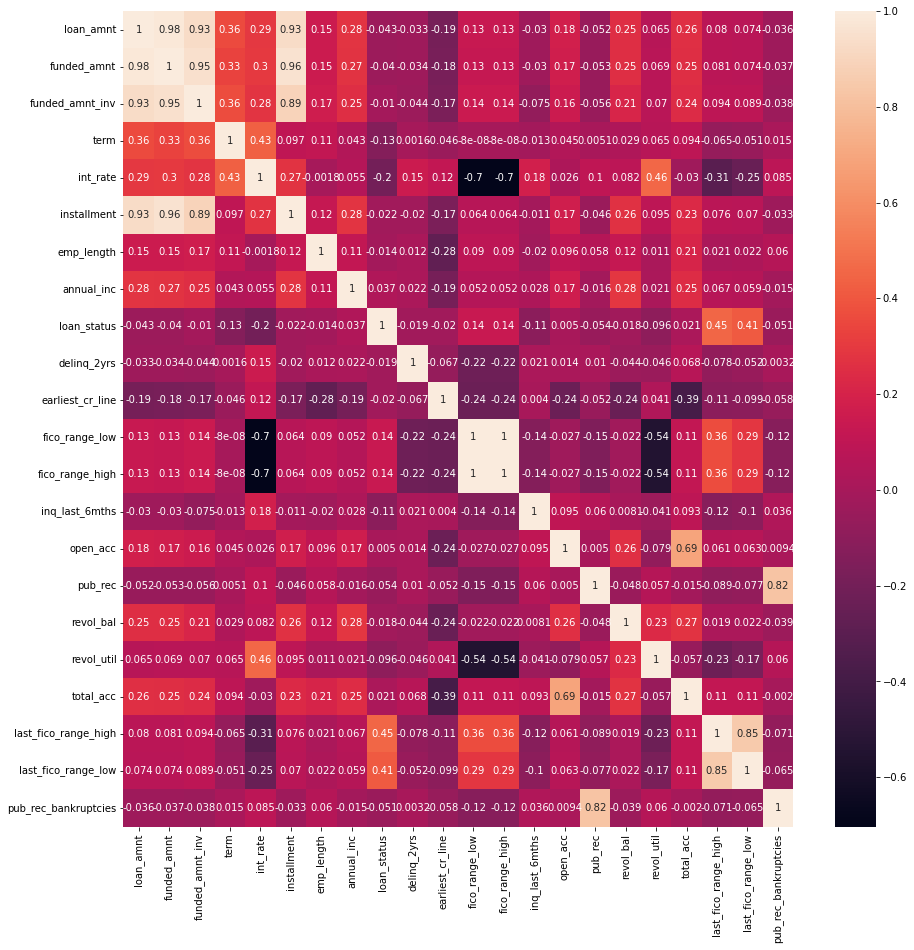

In [122]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

In [123]:
# As we can observe - we have a lot of high correlated columns. Let's remove it.

In [124]:
to_remove = ['funded_amnt', 'funded_amnt_inv', 'installment', 'fico_range_high', 'last_fico_range_low']

In [125]:
dataset = dataset.drop(columns=to_remove)

<AxesSubplot:>

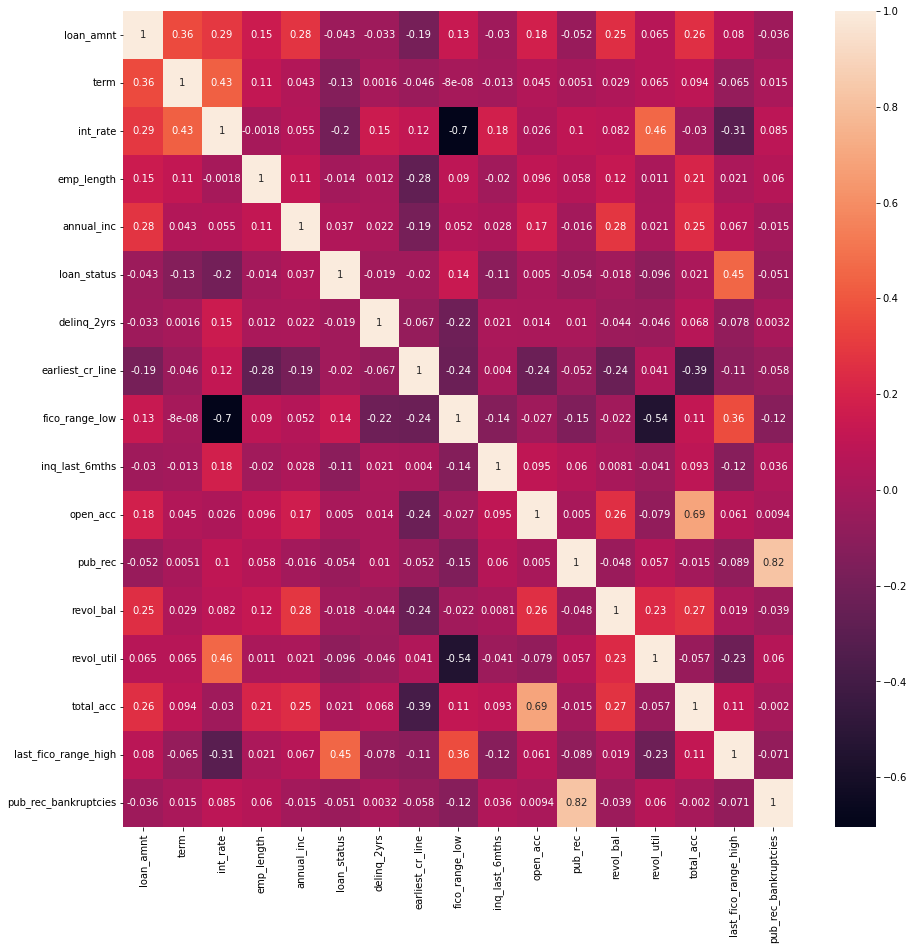

In [126]:
# Now let's look on new correlation heatmap without highly correlated features
corr = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

In [127]:
# We can observe, that there are a high correlation between loan_status and last_fico_range_high. We can also observe,
# that there are more high correlated data (positive and negative) for example:
# fico_range_low - int_rate, total_acc - open-acc, pub_rec_bankrupties - pub_rec and others.

(0.0, 25.0)

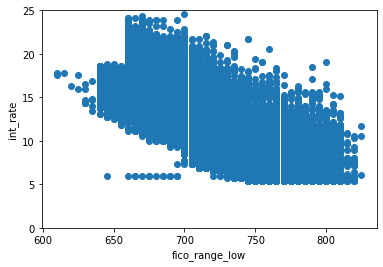

In [128]:
# Exapmle high correlated plot (negative correlation)
plt.scatter(dataset['fico_range_low'], dataset['int_rate'])
plt.xlabel('fico_range_low')
plt.ylabel('int_rate')
plt.ylim([0, 25])

In [129]:
dataset

loan_amnt  term  int_rate grade  emp_length home_ownership  annual_inc  \
0         5000.0  36.0     10.65     B        10.0           RENT     24000.0   
1         2500.0  60.0     15.27     C         1.0           RENT     30000.0   
2         2400.0  36.0     15.96     C        10.0           RENT     12252.0   
3        10000.0  36.0     13.49     C        10.0           RENT     49200.0   
4         3000.0  60.0     12.69     B         1.0           RENT     80000.0   
...          ...   ...       ...   ...         ...            ...         ...   
42508     6000.0  36.0     13.12     D         2.0           RENT     12000.0   
42511    10000.0  36.0     14.70     E         1.0           RENT     50000.0   
42512     2000.0  36.0      7.12     A         7.0       MORTGAGE    150000.0   
42513     6000.0  36.0     10.59     C         1.0           RENT     20000.0   
42514     4400.0  36.0      9.64     B         2.0       MORTGAGE     30000.0   

      verification_status  loan_status             purpose  ...  \
0                Verified            1         credit_card  ...   
1         Source Verified            0                 car  ...   
2            Not Verified            1      small_business  ...   
3         Source Verified            1               other  ...   
4         Source Verified            1               other  ...   
...                   ...          ...                 ...  ...   
42508        Not Verified            1         credit_card  ...   
42511        Not Verified            1         educational  ...   
42512        Not Verified            1  debt_consolidation  ...   
42513        Not Verified            1  debt_consolidation  ...   
42514        Not Verified            1  debt_consolidation  ...   

      fico_range_low inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0              735.0            1.0       3.0      0.0    13648.0        83.7   
1              740.0            5.0       3.0      0.0     1687.0         9.4   
2              735.0            2.0       2.0      0.0     2956.0        98.5   
3              690.0            1.0      10.0      0.0     5598.0        21.0   
4              695.0            0.0      15.0      0.0    27783.0        53.9   
...              ...            ...       ...      ...        ...         ...   
42508          655.0            9.0      15.0      0.0     5251.0        49.3   
42511          650.0            0.0      14.0      0.0    10025.0        85.0   
42512          800.0            0.0       7.0      0.0   150786.0         2.2   
42513          695.0            4.0       5.0      0.0    13660.0        66.0   
42514          695.0            0.0       4.0      0.0     3493.0        63.5   

       total_acc  last_fico_range_high  pub_rec_bankruptcies  \
0            9.0                 739.0                   0.0   
1            4.0                 499.0                   0.0   
2           10.0                 739.0                   0.0   
3           37.0                 604.0                   0.0   
4           38.0                 684.0                   0.0   
...          ...                   ...                   ...   
42508       16.0                 664.0                   0.0   
42511       20.0                 499.0                   0.0   
42512       16.0                 809.0                   0.0   
42513        6.0                 769.0                   0.0   
42514        5.0                 549.0                   0.0   

       debt_settlement_flag  
0                         N  
1                         N  
2                         N  
3                         N  
4                         N  
...                     ...  
42508                     N  
42511                     N  
42512                     N  
42513                     N  
42514                     N  

[42432 rows x 24 columns]

In [130]:
# 3. Questions

In [131]:
#    a) W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

In [132]:
dataset['fico_range_low'].corr(dataset['loan_status'])

0.1416068567009484

In [133]:
dataset['last_fico_range_high'].corr(dataset['loan_status'])

0.44968416261615424

Text(0, 0.5, 'loan_status')

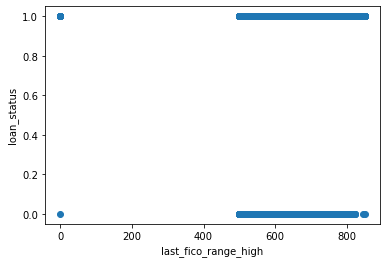

In [134]:
plt.scatter(dataset['last_fico_range_high'], dataset['loan_status'])
plt.xlabel('last_fico_range_high')
plt.ylabel('loan_status')

In [135]:
# We can observe, that loan_status is not highly correlated with fico_range_low, but high correlated with last_fico_range_high
# correlation in both options is positive.
# An increase in the value of indicators results in an increase in the chances of repaying the loan.  

In [136]:
#    b) W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO

In [137]:
dataset['earliest_cr_line'].corr(dataset['loan_status'])

-0.01968252336618297

<AxesSubplot:xlabel='loan_status'>

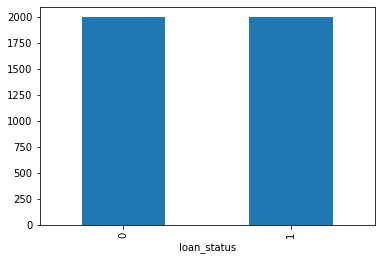

In [138]:
dataset.groupby('loan_status').mean()['earliest_cr_line'].plot(kind='bar')

In [139]:
# earliest_cr_line is not correlated with loan_status. Mean earliest_cr_line is the same for 0 and 1 loan status.

In [140]:
dataset['earliest_cr_line'].corr(dataset['fico_range_low'])

-0.2350045871706483

In [141]:
dataset['earliest_cr_line'].corr(dataset['last_fico_range_high'])

-0.10886778178040646

In [142]:
# Fico is not high correlated with earliest_cr_line.

In [143]:
#    c) W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

In [144]:
data = dataset['home_ownership'].apply(lambda x: 1 if x=='MORTGAGE' else 0)

<AxesSubplot:>

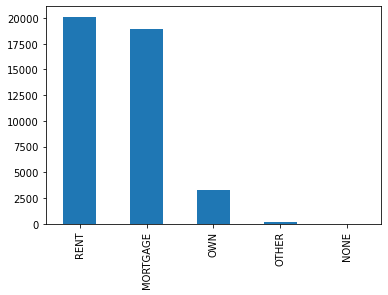

In [145]:
dataset['home_ownership'].value_counts().plot(kind='bar')

In [146]:
# Mortgate is (after rent) second highest popular  home_ownership type.

In [147]:
data.corr(dataset['loan_status'])

0.022158478929382126

In [148]:
# Loan status is not correlated with home_ownership (mortgate).

In [149]:
#    d) W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

<AxesSubplot:xlabel='loan_status'>

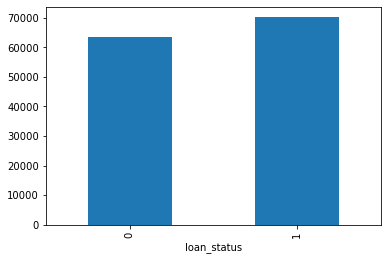

In [150]:
dataset.groupby('loan_status').mean()['annual_inc'].plot(kind='bar')

In [151]:
dataset['annual_inc'].corr(dataset['loan_status'])

0.03737240036612216

In [152]:
# Annual income is not correlated with loan_status, but in general - highest annual_income means higher probability of 
# loan paid.

In [153]:
#    e) W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [154]:
dataset['emp_length'].describe()

count    42432.000000
mean         5.058564
std          3.412555
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [155]:
dataset['loan_status'].corr(dataset['emp_length'])

-0.013981843944899375

In [156]:
# emp_length is not correlated with loan_status.

In [157]:
#    f) Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

<AxesSubplot:>

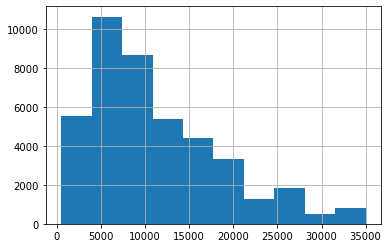

In [158]:
dataset['loan_amnt'].hist()

In [159]:
dataset['loan_status'].corr(dataset['loan_amnt'])

-0.04304311904932016

In [160]:
# From the correlation value obtained, it is clear that the size of the loan is not related 
# to the performance of the obligation.

In [161]:
# 4. Further data exploration

In [162]:
# Let's  create a pairplot for our dataframe

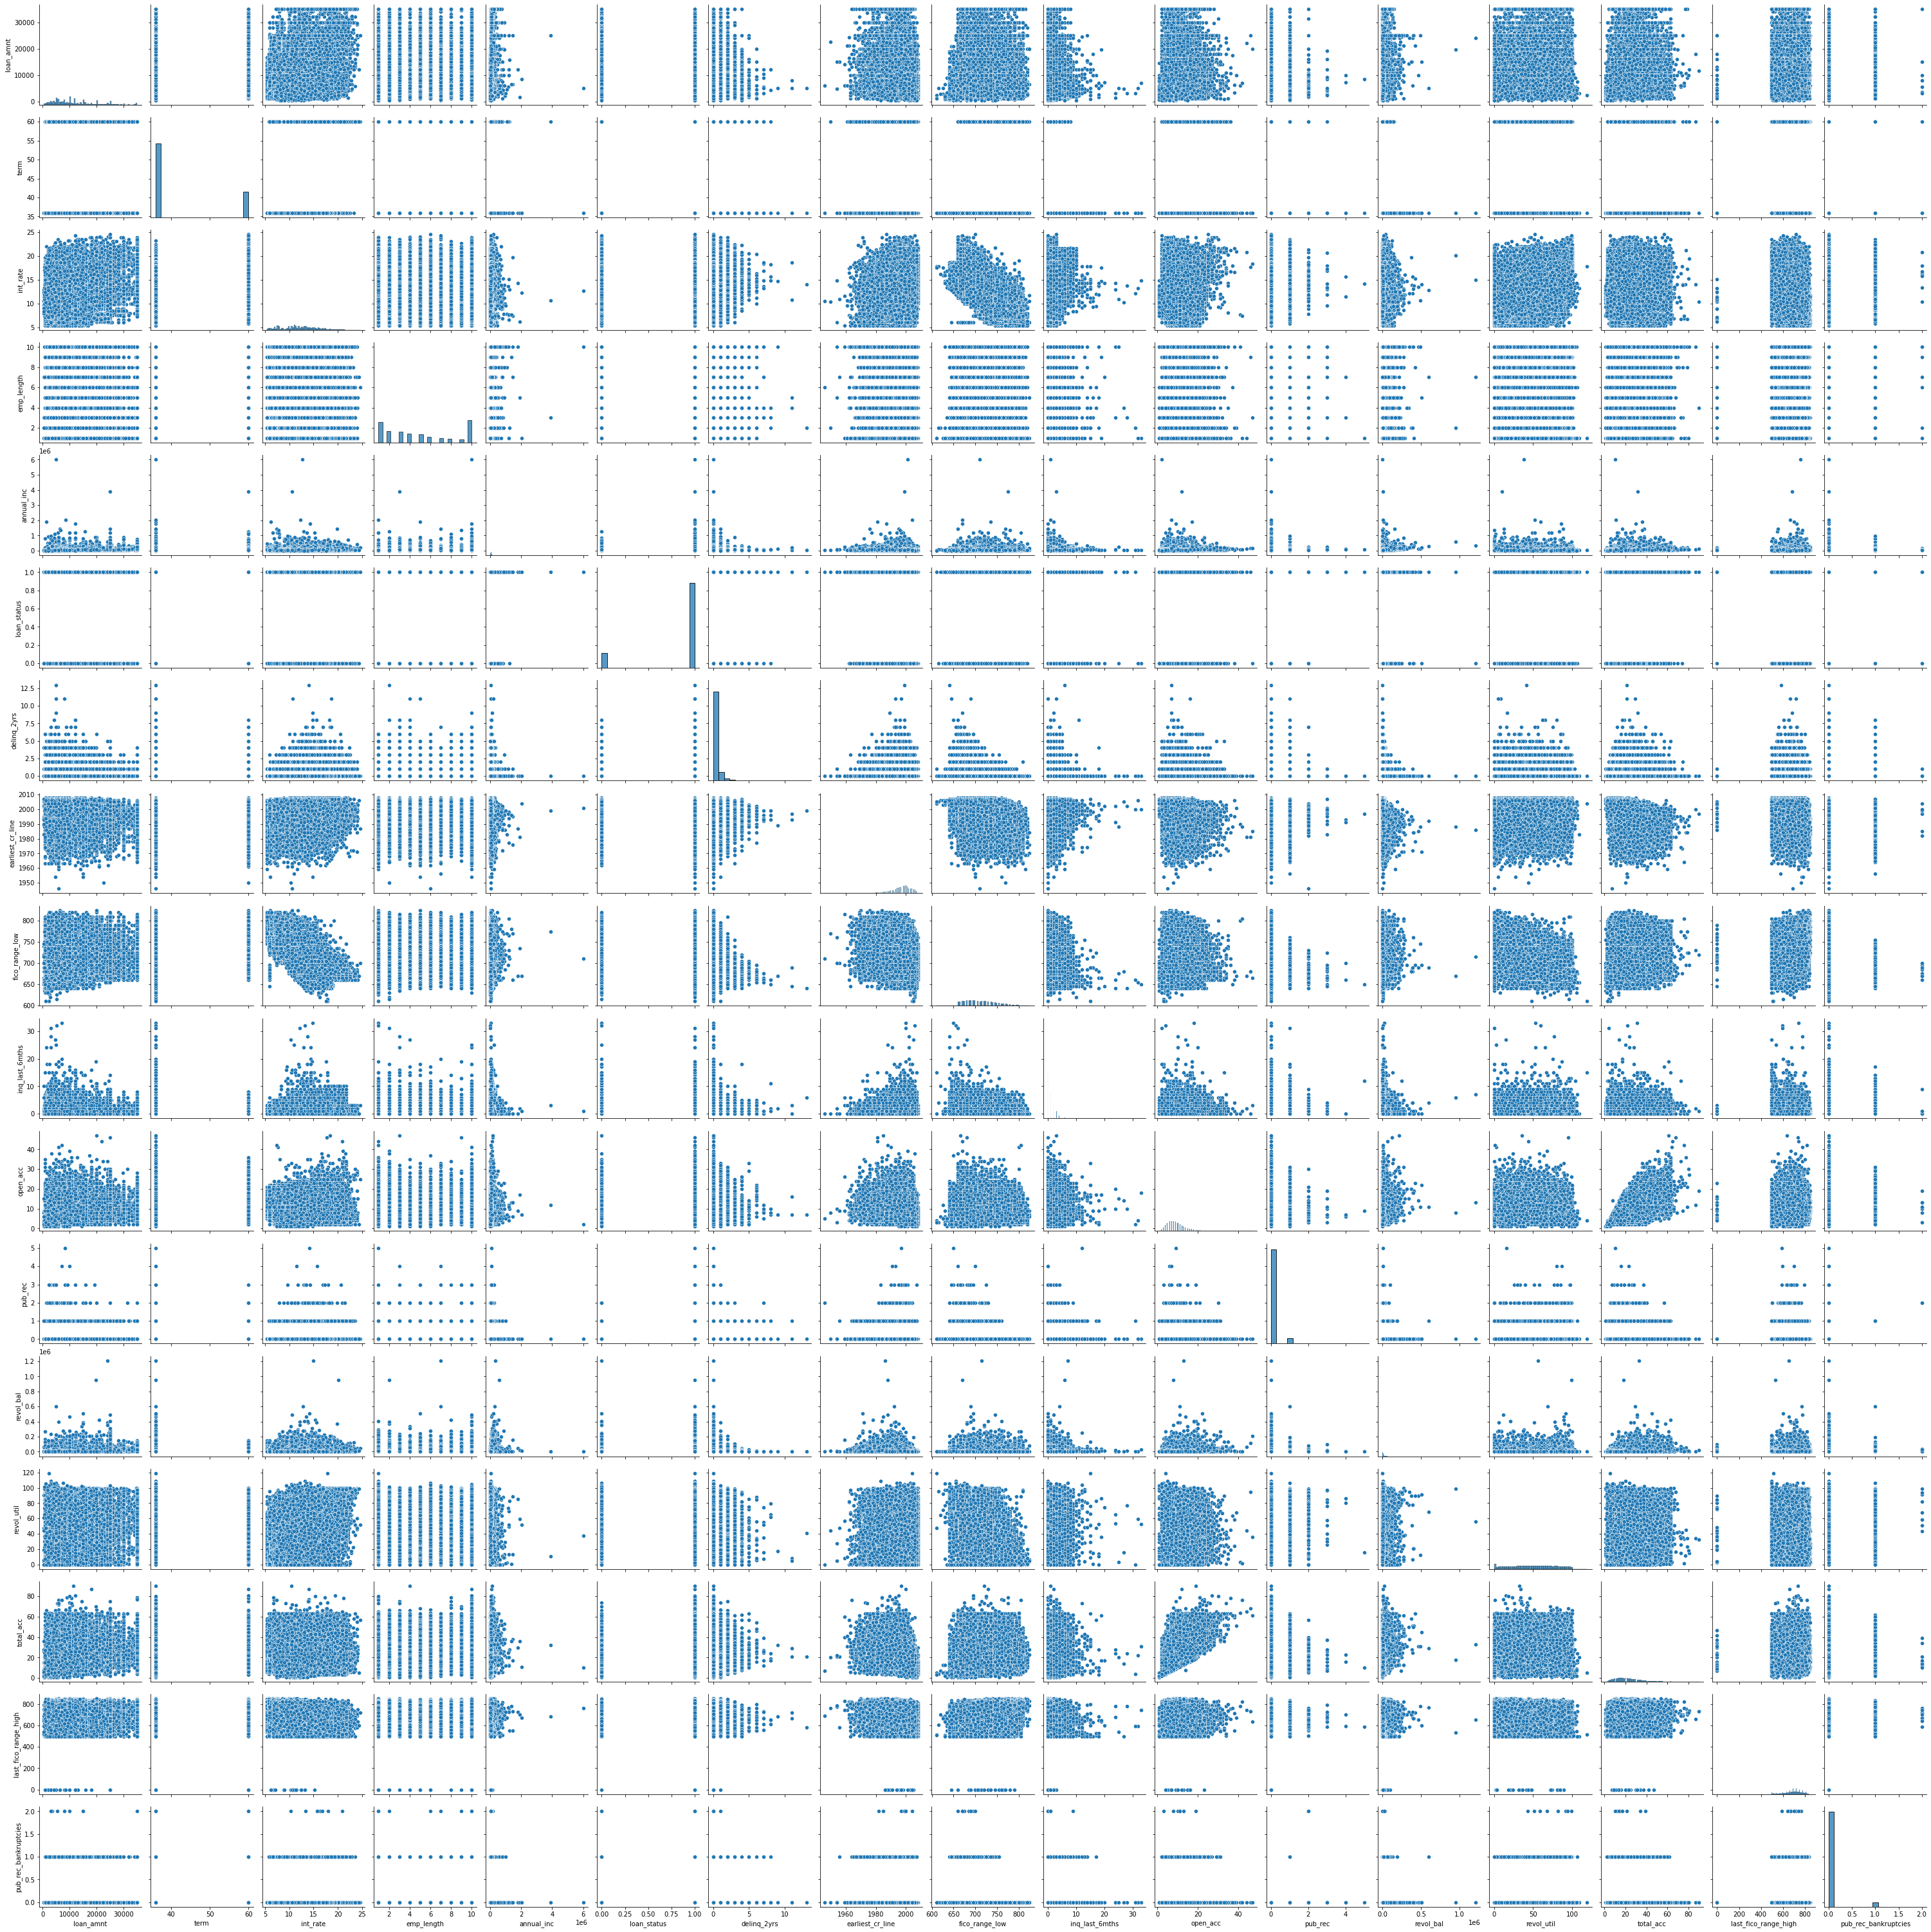

In [163]:
sns.pairplot(dataset)

In [164]:
# We can observe that pairplot shows a lot of useful informations. We can see a data layout and linnear dependence
# between features. It's realy useful kind of plot.

In [165]:
# Let's check is a loan status = 1 have different statisctics than loan status equal 1
dataset[dataset['loan_status'] == 1].describe()

loan_amnt          term      int_rate    emp_length    annual_inc  \
count  36026.000000  36026.000000  36026.000000  36026.000000  3.602600e+04   
mean   10969.345056     41.624604     11.848811      5.038444  7.018314e+04   
std     7298.866286     10.166474      3.644925      3.405183  6.627611e+04   
min      500.000000     36.000000      5.420000      1.000000  1.896000e+03   
25%     5200.000000     36.000000      8.900000      2.000000  4.136430e+04   
50%     9600.000000     36.000000     11.710000      4.000000  6.000000e+04   
75%    15000.000000     36.000000     14.270000      9.000000  8.400000e+04   
max    35000.000000     60.000000     24.590000     10.000000  6.000000e+06   

       loan_status   delinq_2yrs  earliest_cr_line  fico_range_low  \
count      36026.0  36026.000000      36026.000000    36026.000000   
mean           1.0      0.148282       1996.518598      715.229279   
std            0.0      0.506498          6.848806       36.437128   
min            1.0      0.000000       1946.000000      610.000000   
25%            1.0      0.000000       1993.000000      685.000000   
50%            1.0      0.000000       1998.000000      710.000000   
75%            1.0      0.000000       2001.000000      740.000000   
max            1.0     13.000000       2008.000000      825.000000   

       inq_last_6mths      open_acc       pub_rec      revol_bal  \
count    36026.000000  36026.000000  36026.000000   36026.000000   
mean         1.009632      9.360795      0.052601   14157.095459   
std          1.425121      4.456892      0.236169   20744.178483   
min          0.000000      1.000000      0.000000       0.000000   
25%          0.000000      6.000000      0.000000    3626.250000   
50%          1.000000      9.000000      0.000000    8808.500000   
75%          2.000000     12.000000      0.000000   17153.750000   
max         31.000000     46.000000      5.000000  952013.000000   

         revol_util     total_acc  last_fico_range_high  pub_rec_bankruptcies  
count  36026.000000  36026.000000          36026.000000          36026.000000  
mean      47.974229     22.242603            705.325848              0.039444  
std       28.271036     11.547527             72.744918              0.195505  
min        0.000000      1.000000              0.000000              0.000000  
25%       24.400000     14.000000            669.000000              0.000000  
50%       48.100000     21.000000            714.000000              0.000000  
75%       71.300000     29.000000            759.000000              0.000000  
max      119.000000     90.000000            850.000000              2.000000

In [166]:
dataset[dataset['loan_status'] == 0].describe()

loan_amnt         term     int_rate   emp_length    annual_inc  \
count   6406.000000  6406.000000  6406.000000  6406.000000  6.406000e+03   
mean   11860.326257    45.553544    13.923011     5.171714  6.349243e+04   
std     7970.991495    11.748889     3.561015     3.451801  4.972615e+04   
min      500.000000    36.000000     5.420000     1.000000  2.000000e+03   
25%     5500.000000    36.000000    11.490000     2.000000  3.700200e+04   
50%    10000.000000    36.000000    13.800000     4.000000  5.317400e+04   
75%    16000.000000    60.000000    16.400000     9.000000  7.500000e+04   
max    35000.000000    60.000000    24.400000    10.000000  1.250000e+06   

       loan_status  delinq_2yrs  earliest_cr_line  fico_range_low  \
count       6406.0  6406.000000       6406.000000     6406.000000   
mean           0.0     0.176085       1996.894630      700.915548   
std            0.0     0.543412          6.782098       32.167000   
min            0.0     0.000000       1962.000000      615.000000   
25%            0.0     0.000000       1994.000000      675.000000   
50%            0.0     0.000000       1998.000000      695.000000   
75%            0.0     0.000000       2001.000000      720.000000   
max            0.0     8.000000       2008.000000      820.000000   

       inq_last_6mths     open_acc     pub_rec     revol_bal   revol_util  \
count     6406.000000  6406.000000  6406.00000  6.406000e+03  6406.000000   
mean         1.482829     9.297534     0.08976  1.525224e+04    55.556773   
std          1.961121     4.695720     0.29234  2.798177e+04    28.018435   
min          0.000000     1.000000     0.00000  0.000000e+00     0.000000   
25%          0.000000     6.000000     0.00000  3.923750e+03    34.400000   
50%          1.000000     9.000000     0.00000  9.147500e+03    58.200000   
75%          2.000000    12.000000     0.00000  1.781250e+04    79.200000   
max         33.000000    47.000000     2.00000  1.207359e+06   106.500000   

         total_acc  last_fico_range_high  pub_rec_bankruptcies  
count  6406.000000           6406.000000           6406.000000  
mean     21.577740            604.015923              0.068686  
std      11.793492             67.975900              0.254170  
min       1.000000              0.000000              0.000000  
25%      13.000000            549.000000              0.000000  
50%      20.000000            609.000000              0.000000  
75%      29.000000            654.000000              0.000000  
max      74.000000            850.000000              2.000000

In [167]:
# We can see that describing variables statistics for different loan_status are different. So we can assume, that
# classification of target variable based on describing variables will be possible. So, out hypothesis is - 
# we can predict loan_status based on other selected features.

In [168]:
# Part 3. Feature engineering.

In [169]:
# Now, we have to transfoorm all data to numerical

In [170]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42432 entries, 0 to 42514
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42432 non-null  float64
 1   term                  42432 non-null  float64
 2   int_rate              42432 non-null  float64
 3   grade                 42432 non-null  object 
 4   emp_length            42432 non-null  float64
 5   home_ownership        42432 non-null  object 
 6   annual_inc            42432 non-null  float64
 7   verification_status   42432 non-null  object 
 8   loan_status           42432 non-null  int64  
 9   purpose               42432 non-null  object 
 10  title                 42432 non-null  object 
 11  addr_state            42432 non-null  object 
 12  delinq_2yrs           42432 non-null  float64
 13  earliest_cr_line      42432 non-null  int64  
 14  fico_range_low        42432 non-null  float64
 15  inq_last_6mths     

In [171]:
# Grade - one hot encding
print(dataset['grade'].value_counts())
one_hot_cols = ['grade']

B    12372
A    10170
C     8716
D     5993
E     3379
F     1293
G      509
Name: grade, dtype: int64


In [172]:
# home_ownership
print(dataset['home_ownership'].value_counts())

RENT        20121
MORTGAGE    18933
OWN          3240
OTHER         134
NONE            4
Name: home_ownership, dtype: int64


In [173]:
# Remove None 
dataset = dataset[dataset['home_ownership'] != 'NONE']

In [174]:
# home_ownership
print(dataset['home_ownership'].value_counts())

RENT        20121
MORTGAGE    18933
OWN          3240
OTHER         134
Name: home_ownership, dtype: int64


In [175]:
# Add to one hot encoding
one_hot_cols.append('home_ownership')

In [176]:
# verification_status
print(dataset['verification_status'].value_counts())

Not Verified       18681
Verified           13457
Source Verified    10290
Name: verification_status, dtype: int64


In [177]:
# One hot encoding
one_hot_cols.append('verification_status')

In [178]:
# purpose
print(dataset['purpose'].value_counts())

debt_consolidation    19755
credit_card            5472
other                  4377
home_improvement       3194
major_purchase         2303
small_business         1989
car                    1611
wedding                1003
medical                 751
moving                  626
house                   425
educational             417
vacation                399
renewable_energy        106
Name: purpose, dtype: int64


In [179]:
# One hot encoding
one_hot_cols.append('purpose')

In [180]:
# title 
print(dataset['title'].value_counts())

Debt Consolidation                         2257
Debt Consolidation Loan                    1759
Personal Loan                               708
Consolidation                               546
debt consolidation                          532
                                           ... 
Springs                                       1
Bob's Loan                                    1
To Hell With Dept                             1
Consolidating to lower monthly payments       1
VISA                                          1
Name: title, Length: 21207, dtype: int64


In [181]:
# We can create a new feature - based on description of loan (maybe length will be important in our analysis)

In [182]:
dataset['title_len'] = dataset['title'].apply(lambda x: len(x))

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [183]:
# Drop title (categorical)
dataset = dataset.drop(columns=['title'])

In [184]:
# addr_state

In [185]:
print(dataset['addr_state'].value_counts())

CA    7420
NY    4054
FL    3098
TX    2906
NJ    1979
IL    1670
PA    1645
GA    1501
VA    1484
MA    1431
OH    1323
MD    1123
AZ     928
WA     887
CO     855
NC     829
CT     813
MI     795
MO     761
MN     649
NV     526
WI     515
SC     489
AL     483
OR     467
LA     460
KY     358
OK     316
KS     296
UT     278
AR     260
DC     222
RI     208
NM     205
NH     188
WV     187
HI     180
DE     135
MT      96
WY      87
AK      86
SD      66
VT      57
TN      32
MS      26
IN      19
IA      12
NE      11
ID       9
ME       3
Name: addr_state, dtype: int64


In [186]:
# One hot encoding
one_hot_cols.append('addr_state')

In [187]:
# debt_settlement_flag
print(dataset['debt_settlement_flag'].value_counts())

N    42268
Y      160
Name: debt_settlement_flag, dtype: int64


In [188]:
# Convert Y to 1 and N to 0

In [189]:
dataset['debt_settlement_flag'] = dataset['debt_settlement_flag'].apply(lambda x: 1 if x=='Y' else 0)

In [190]:
print(dataset['debt_settlement_flag'].value_counts())

0    42268
1      160
Name: debt_settlement_flag, dtype: int64


In [191]:
# Let's do a one hot encoding on selected columns

In [192]:
dataset_features = pd.get_dummies(dataset, columns = one_hot_cols)

In [193]:
dataset_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42428 entries, 0 to 42514
Data columns (total 97 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            42428 non-null  float64
 1   term                                 42428 non-null  float64
 2   int_rate                             42428 non-null  float64
 3   emp_length                           42428 non-null  float64
 4   annual_inc                           42428 non-null  float64
 5   loan_status                          42428 non-null  int64  
 6   delinq_2yrs                          42428 non-null  float64
 7   earliest_cr_line                     42428 non-null  int64  
 8   fico_range_low                       42428 non-null  float64
 9   inq_last_6mths                       42428 non-null  float64
 10  open_acc                             42428 non-null  float64
 11  pub_rec                     

In [194]:
# dtypes: float64(15), int64(4), uint8(78) 

In [195]:
# Succes! We have all columns numerical.

In [196]:
dataset_features.describe()

loan_amnt          term      int_rate    emp_length    annual_inc  \
count  42428.000000  42428.000000  42428.000000  42428.000000  4.242800e+04   
mean   11104.154686     42.218346     12.162118      5.058735  6.917215e+04   
std     7411.152103     10.515469      3.707491      3.412599  6.409843e+04   
min      500.000000     36.000000      5.420000      1.000000  1.896000e+03   
25%     5200.000000     36.000000      9.630000      2.000000  4.000000e+04   
50%     9800.000000     36.000000     11.990000      4.000000  5.900000e+04   
75%    15000.000000     60.000000     14.720000      9.000000  8.250000e+04   
max    35000.000000     60.000000     24.590000     10.000000  6.000000e+06   

        loan_status   delinq_2yrs  earliest_cr_line  fico_range_low  \
count  42428.000000  42428.000000      42428.000000    42428.000000   
mean       0.849038      0.152446       1996.575328      713.067196   
std        0.358016      0.512276          6.840313       36.187655   
min        0.000000      0.000000       1946.000000      610.000000   
25%        1.000000      0.000000       1993.000000      685.000000   
50%        1.000000      0.000000       1998.000000      710.000000   
75%        1.000000      0.000000       2001.000000      740.000000   
max        1.000000     13.000000       2008.000000      825.000000   

       inq_last_6mths  ...  addr_state_SD  addr_state_TN  addr_state_TX  \
count    42428.000000  ...   42428.000000   42428.000000   42428.000000   
mean         1.081055  ...       0.001556       0.000754       0.068493   
std          1.527648  ...       0.039411       0.027453       0.252592   
min          0.000000  ...       0.000000       0.000000       0.000000   
25%          0.000000  ...       0.000000       0.000000       0.000000   
50%          1.000000  ...       0.000000       0.000000       0.000000   
75%          2.000000  ...       0.000000       0.000000       0.000000   
max         33.000000  ...       1.000000       1.000000       1.000000   

       addr_state_UT  addr_state_VA  addr_state_VT  addr_state_WA  \
count   42428.000000   42428.000000   42428.000000   42428.000000   
mean        0.006552       0.034977       0.001343       0.020906   
std         0.080681       0.183723       0.036629       0.143071   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       addr_state_WI  addr_state_WV  addr_state_WY  
count   42428.000000   42428.000000   42428.000000  
mean        0.012138       0.004407       0.002051  
std         0.109504       0.066243       0.045237  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 97 columns]

In [197]:
# Part 4. Modeling

In [198]:
# Clusterization

In [199]:
# Define X and Y values

In [200]:
X = dataset_features.drop(columns=['loan_status']).values
Y = dataset_features['loan_status'].values

In [201]:
# Normalize the data - for clusterization with min max scaler

In [202]:
from sklearn.preprocessing import MinMaxScaler

In [203]:
min_max_scaler = MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X)

In [204]:
# K-means
from sklearn.cluster import KMeans

In [205]:
# Checking for k = 15 - creating list of inertia ( easuring the distance between each data point and its centroid)
inertia_list = []
clusters = 15
for cluster_no in range(1, clusters+1):
    K_mean = KMeans(n_clusters=cluster_no)
    K_mean.fit(X_min_max)
    inertia_list.append(K_mean.inertia_)

Text(0.5, 1.0, 'KMeans clusterization')

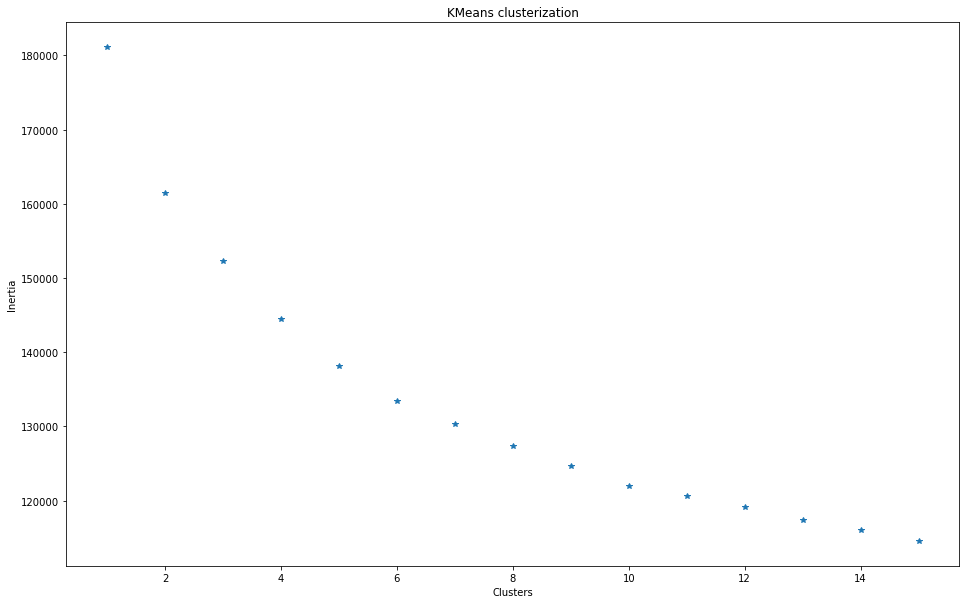

In [206]:
# Elbow method
plt.figure(figsize=(16, 10))
x_plot = list(range(1, clusters+1))
plt.plot(x_plot, inertia_list, '*')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('KMeans clusterization')

In [207]:
# Let's choose 8 clusters - based on an elbow method and create a model
cl = 8
K_mean = KMeans(n_clusters=8)
K_mean.fit(X_min_max)

KMeans()

In [208]:
# Clusters analysis

In [209]:
labels = pd.DataFrame(K_mean.labels_)
labeledData = pd.concat((dataset_features, labels), axis = 1)
labeledData = labeledData.rename({0:'labels'},axis=1)

In [210]:
labeledData['labels'].value_counts()

4.0    7154
7.0    7002
1.0    6276
6.0    5340
0.0    5251
5.0    4950
3.0    3501
2.0    2954
Name: labels, dtype: int64

In [211]:
# We have 8 clusters with different number of samples. It is not balanced, but for sure consists a lot of useful
# informations.

In [212]:
# Let's check loan_status for each cluster
for cluster_no in range(8):
    print("Cluster "+str(cluster_no))
    print(labeledData[labeledData['labels']==cluster_no]['loan_status'].value_counts())

Cluster 0
1.0    4518
0.0     721
Name: loan_status, dtype: int64
Cluster 1
1.0    5258
0.0    1006
Name: loan_status, dtype: int64
Cluster 2
1.0    2524
0.0     424
Name: loan_status, dtype: int64
Cluster 3
1.0    2937
0.0     555
Name: loan_status, dtype: int64
Cluster 4
1.0    6018
0.0    1123
Name: loan_status, dtype: int64
Cluster 5
1.0    4224
0.0     720
Name: loan_status, dtype: int64
Cluster 6
1.0    4533
0.0     802
Name: loan_status, dtype: int64
Cluster 7
1.0    5955
0.0    1034
Name: loan_status, dtype: int64


In [213]:
# In each cluster we have a majority of 1 class of loan_status. Unfortunatelly, we don't have a clusters with only 
# 1 or 0 class. So, clusters has been created based on another features than loan_status (more important).

In [214]:
# Generate clusters descriptoins
describe_list = []
for cl_no in range(cl):
    print(f"Cluster {cl_no}")
    describe = labeledData[labeledData['labels']==cl_no].describe()
    describe_list.append(describe)
    print(describe)

Cluster 0
          loan_amnt         term     int_rate   emp_length    annual_inc  \
count   5239.000000  5239.000000  5239.000000  5239.000000  5.239000e+03   
mean   10696.087040    41.231533    11.662132     5.079595  6.771838e+04   
std     7066.504414     9.909924     3.676963     3.442868  5.428647e+04   
min      750.000000    36.000000     5.420000     1.000000  5.500000e+03   
25%     5087.500000    36.000000     8.490000     2.000000  4.000000e+04   
50%     9000.000000    36.000000    11.490000     4.000000  5.800000e+04   
75%    14637.500000    36.000000    14.220000     9.000000  8.000000e+04   
max    35000.000000    60.000000    24.400000    10.000000  1.900000e+06   

       loan_status  delinq_2yrs  earliest_cr_line  fico_range_low  \
count  5239.000000  5239.000000       5239.000000     5239.000000   
mean      0.862378     0.145257       1996.475854      716.838137   
std       0.344535     0.520386          6.824879       36.264847   
min       0.000000     0.0000

          loan_amnt         term     int_rate   emp_length    annual_inc  \
count   3492.000000  3492.000000  3492.000000  3492.000000  3.492000e+03   
mean   12082.545819    43.319588    12.360977     5.192153  7.087836e+04   
std     7785.320727    11.051186     3.892369     3.435624  6.171517e+04   
min      500.000000    36.000000     5.420000     1.000000  8.088000e+03   
25%     6000.000000    36.000000     9.630000     2.000000  4.200000e+04   
50%    10000.000000    36.000000    12.180000     4.000000  6.000000e+04   
75%    16000.000000    60.000000    15.210000     9.000000  8.442500e+04   
max    35000.000000    60.000000    23.910000    10.000000  1.782000e+06   

       loan_status  delinq_2yrs  earliest_cr_line  fico_range_low  \
count  3492.000000  3492.000000       3492.000000     3492.000000   
mean      0.841065     0.159794       1996.581615      713.665521   
std       0.365668     0.531137          6.816743       35.867253   
min       0.000000     0.000000       1

          loan_amnt         term     int_rate   emp_length    annual_inc  \
count   6989.000000  6989.000000  6989.000000  6989.000000  6.989000e+03   
mean   11845.979396    43.726427    12.297506     5.254400  7.180166e+04   
std     7969.842265    11.214034     3.915702     3.419691  8.991298e+04   
min     1000.000000    36.000000     5.420000     1.000000  4.800000e+03   
25%     5600.000000    36.000000     9.620000     2.000000  4.200000e+04   
50%    10000.000000    36.000000    12.210000     5.000000  6.000000e+04   
75%    16000.000000    60.000000    15.050000     9.000000  8.500000e+04   
max    35000.000000    60.000000    24.110000    10.000000  6.000000e+06   

       loan_status  delinq_2yrs  earliest_cr_line  fico_range_low  \
count  6989.000000  6989.000000       6989.000000     6989.000000   
mean      0.852053     0.148233       1996.609815      714.142939   
std       0.355073     0.487161          6.687661       35.631249   
min       0.000000     0.000000       1

In [215]:
# As we can observe we have a lot of description data, but its not readable. We can visualize it on bar plots.
# (selected featurs)

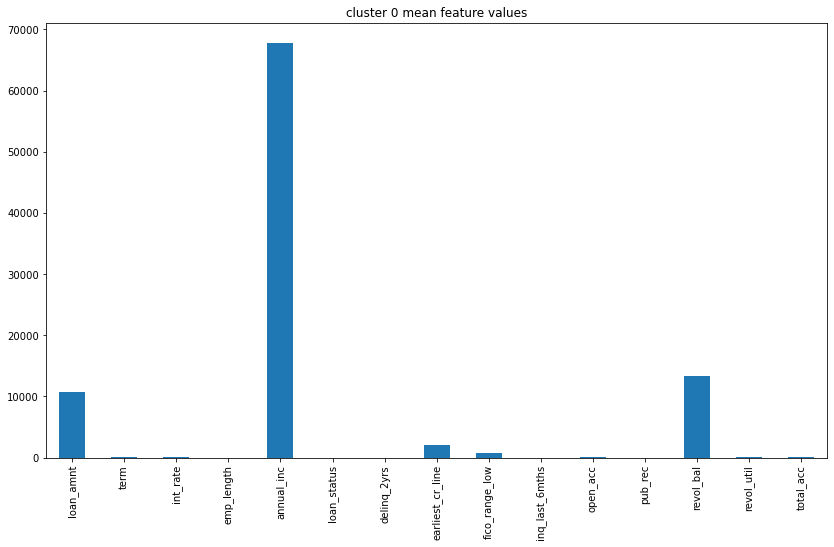

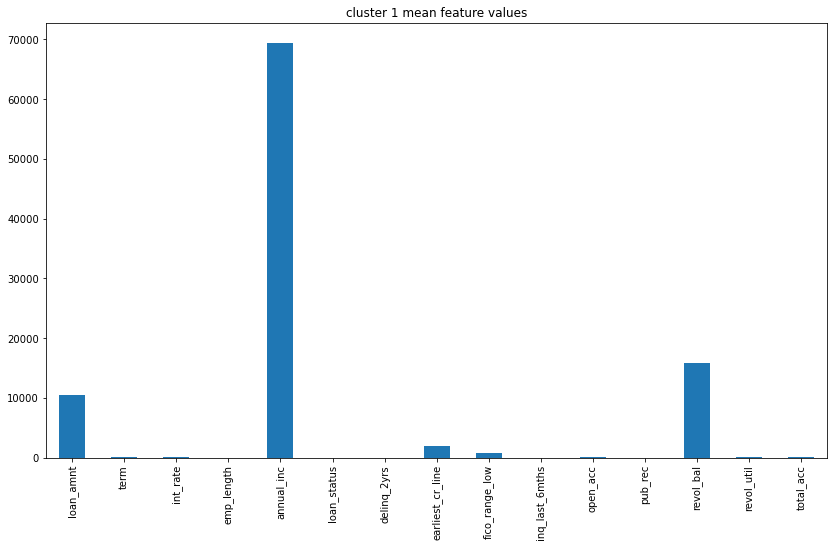

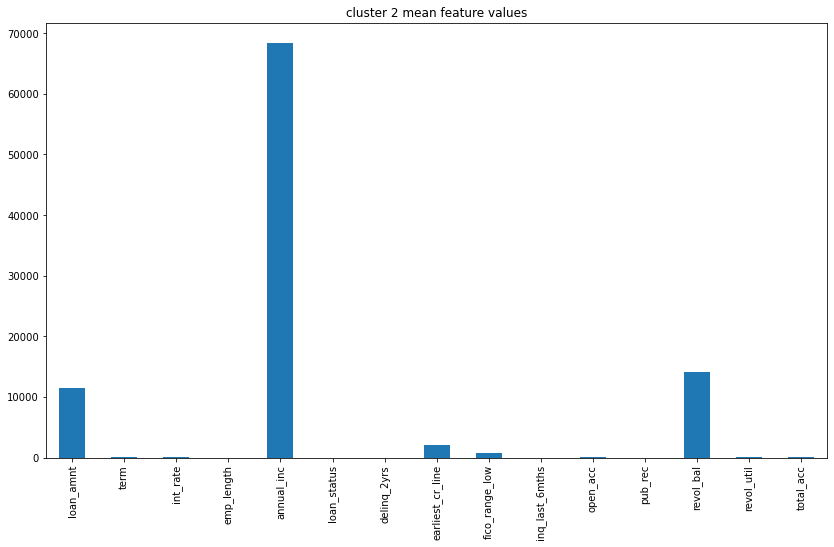

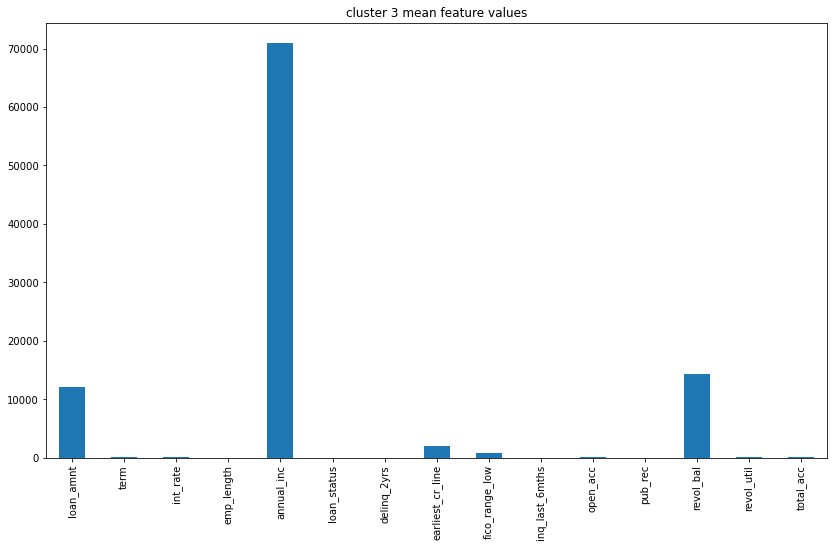

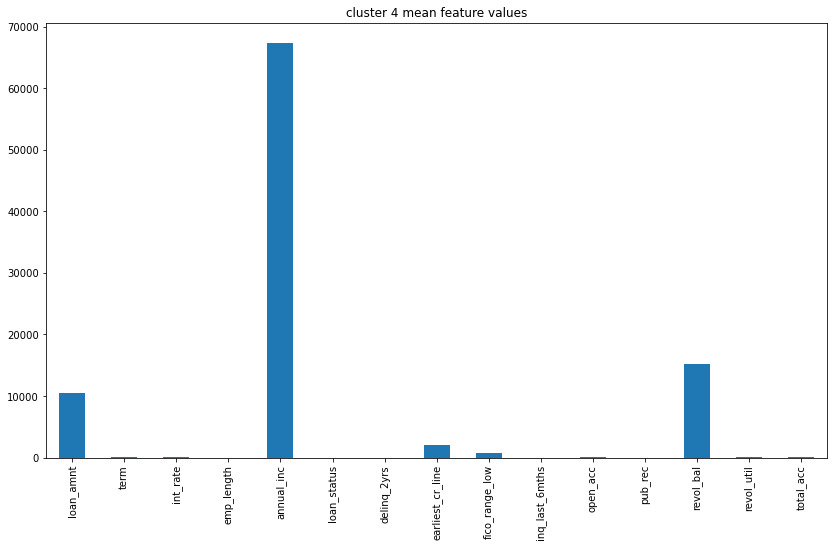

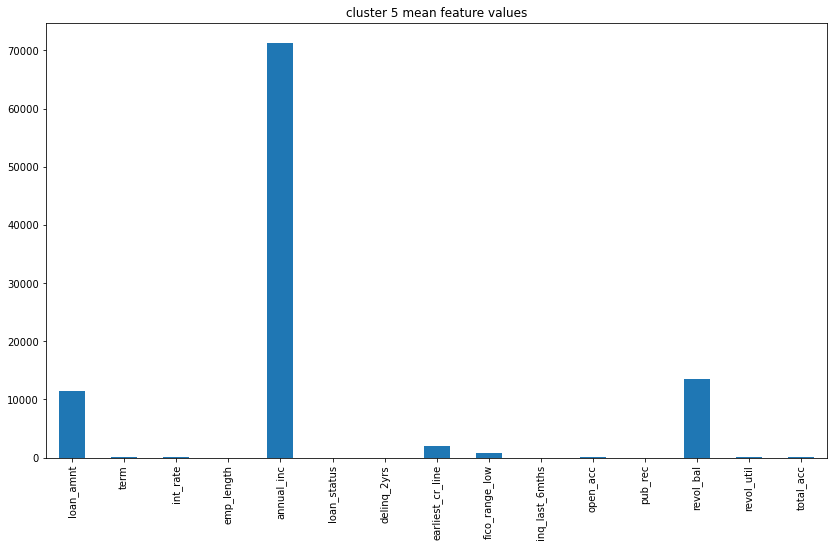

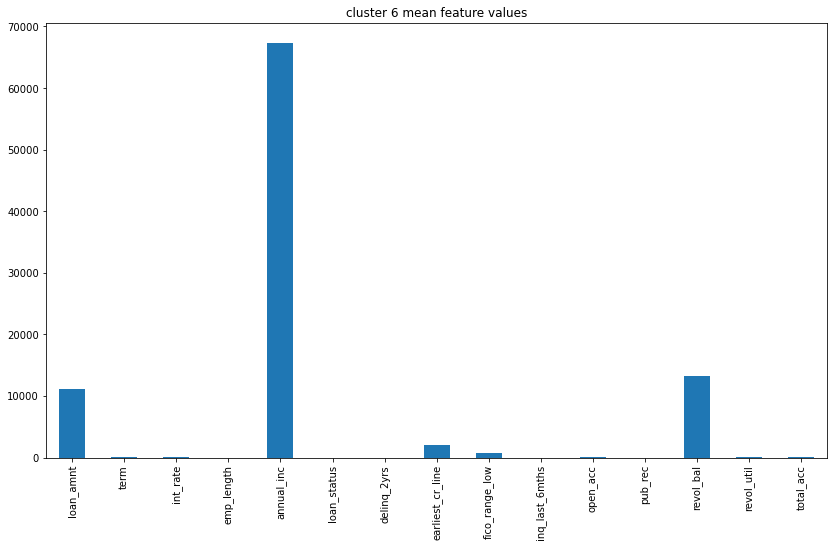

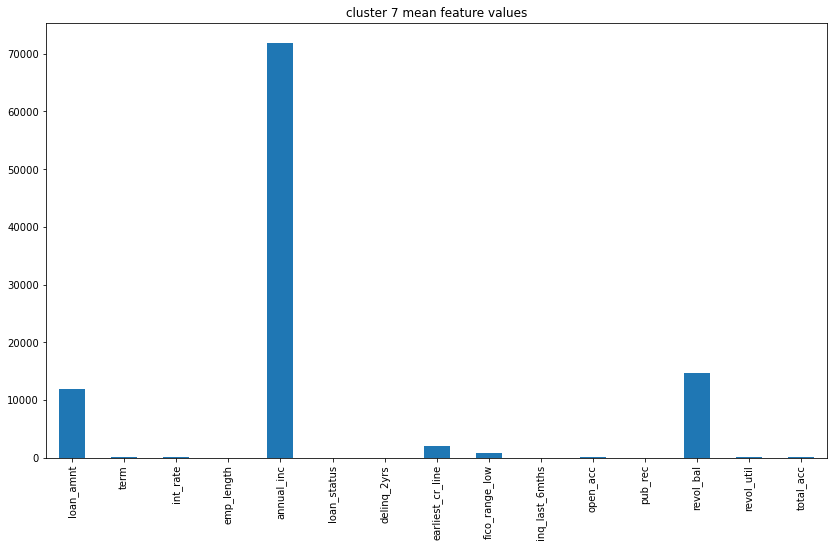

In [216]:
for cluster, describe_element in enumerate(describe_list):
    plt.figure(figsize=(14, 8))
    plt.title(f'cluster {cluster} mean feature values')
    describe_element[describe_list[0].columns[0:15]].loc['mean'].plot(kind='bar')

In [217]:
# Highest loan payment is in the last cluster. We can observe, that loan_amnt mean is almost 10k and annual income
# about 70k. In cluster 3 we have a highest number of loan status equal 0. Loan_amnt mean is higher than 10k and 
# annual income is grater than 70k.

In [218]:
# Hierarchy clustering

In [219]:
import scipy.cluster.hierarchy as shc

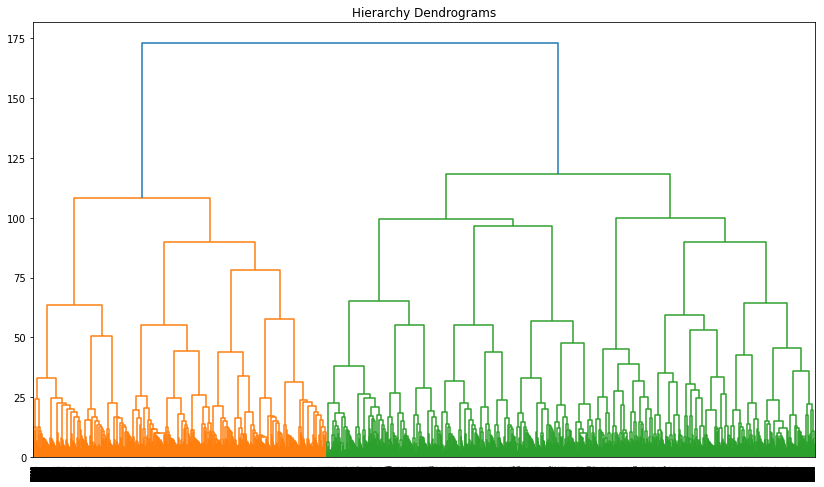

In [644]:
plt.figure(figsize=(14, 8))  
plt.title("Hierarchy Dendrograms")  
dendrograms = shc.dendrogram(shc.linkage(X_min_max, method='ward'))

In [220]:
# Let's set a threshold equal 120, lines are the longest then. So, we have 2 clusters.

In [221]:
from sklearn.cluster import AgglomerativeClustering
h_cl = 2
hierarchy = AgglomerativeClustering(n_clusters=h_cl, affinity='euclidean', linkage='ward')  
hierarchy.fit_predict(X_min_max)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [222]:
labels_hierarchy = pd.DataFrame(hierarchy.labels_)
labeledDataHierarchy = pd.concat((dataset, labels_hierarchy), axis = 1)
labeledDataHierarchy = labeledDataHierarchy.rename({0:'labels'},axis=1)

In [223]:
for cl_no in range(h_cl):
    print("Cluster "+str(cl_no))
    print(labeledDataHierarchy[labeledDataHierarchy['labels']==cl_no]['loan_status'].value_counts())

Cluster 0
1.0    22348
0.0     4106
Name: loan_status, dtype: int64
Cluster 1
1.0    13619
0.0     2279
Name: loan_status, dtype: int64


In [224]:
# Clusters are not balanced - we have a larger number of loan_status equal 1 in first cluster.

In [225]:
# Generate clusters descriptoins
describe_list = []
for cl_no in range(h_cl):
    print(f"Cluster {cl_no}")
    describe = labeledData[labeledData['labels']==cl_no].describe()
    describe_list.append(describe)
    print(describe)

Cluster 0
          loan_amnt         term     int_rate   emp_length    annual_inc  \
count   5239.000000  5239.000000  5239.000000  5239.000000  5.239000e+03   
mean   10696.087040    41.231533    11.662132     5.079595  6.771838e+04   
std     7066.504414     9.909924     3.676963     3.442868  5.428647e+04   
min      750.000000    36.000000     5.420000     1.000000  5.500000e+03   
25%     5087.500000    36.000000     8.490000     2.000000  4.000000e+04   
50%     9000.000000    36.000000    11.490000     4.000000  5.800000e+04   
75%    14637.500000    36.000000    14.220000     9.000000  8.000000e+04   
max    35000.000000    60.000000    24.400000    10.000000  1.900000e+06   

       loan_status  delinq_2yrs  earliest_cr_line  fico_range_low  \
count  5239.000000  5239.000000       5239.000000     5239.000000   
mean      0.862378     0.145257       1996.475854      716.838137   
std       0.344535     0.520386          6.824879       36.264847   
min       0.000000     0.0000

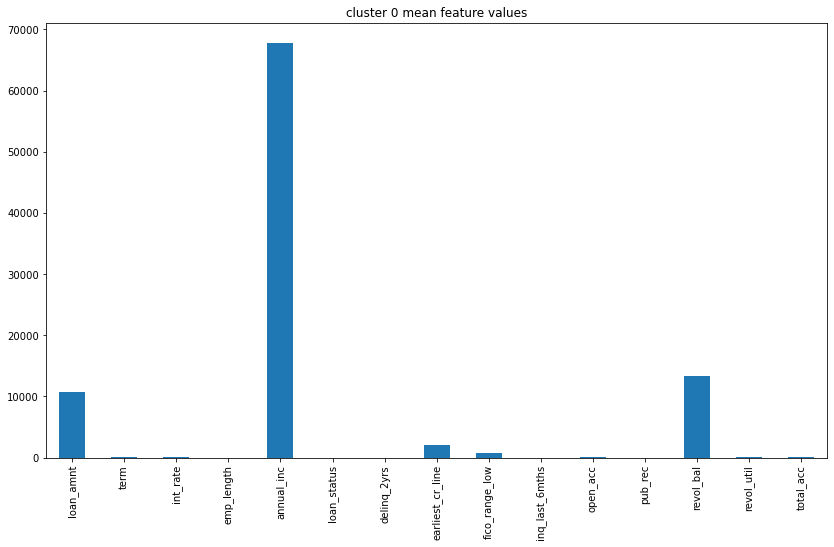

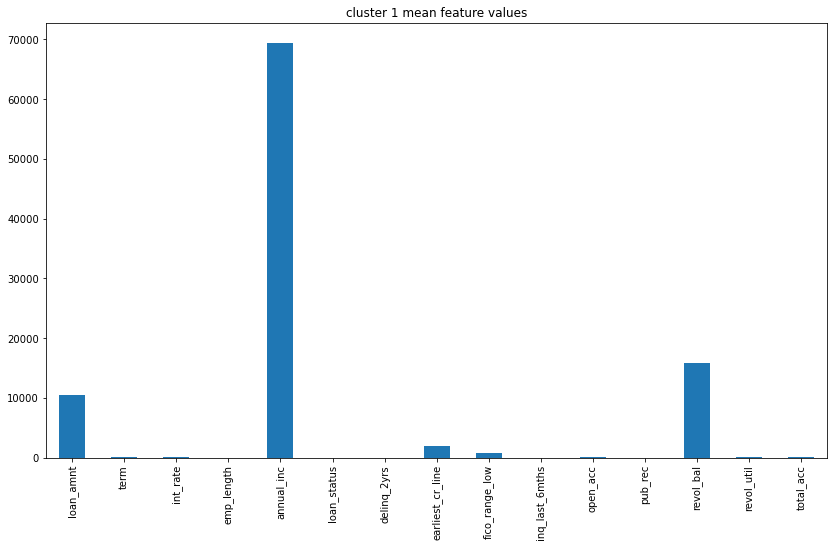

In [226]:
# Plot visualizations (selected featurs)
for cluster, describe_element in enumerate(describe_list):
    plt.figure(figsize=(14, 8))
    plt.title(f'cluster {cluster} mean feature values')
    describe_element[describe_list[0].columns[0:15]].loc['mean'].plot(kind='bar')

In [227]:
# In this case, we have only two clusters - it is easier to judge (for example, by the average) that they
# are not differ in general.
# The soft differences are in the loan_amount - cluster 0 has a higher average than 1.

In [228]:
# DBScan (based on website)

In [229]:
# Searching for closer point
from sklearn.neighbors import NearestNeighbors
nghbrs = NearestNeighbors(n_neighbors=2)
nbrs = nghbrs.fit(X_min_max)

In [230]:
distances, indices = nbrs.kneighbors(X_min_max)

In [231]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

Text(0, 0.5, 'EPS (point to nearest neighbour distance)')

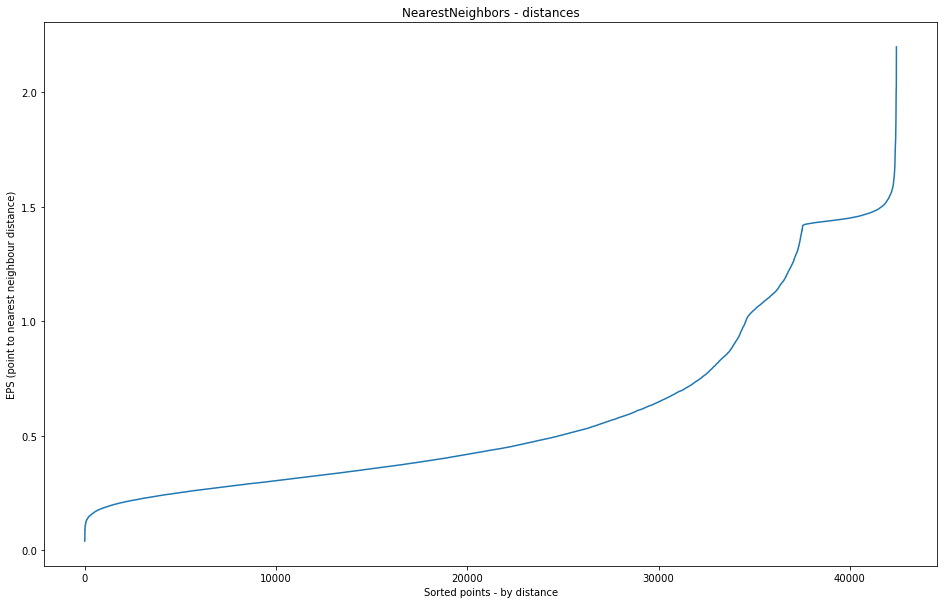

In [232]:
# Sorted distances
plt.figure(figsize=(16,10))
plt.plot(list(range(len(distances))), distances)
plt.title('NearestNeighbors - distances')
plt.xlabel('Sorted points - by distance')
plt.ylabel('EPS (point to nearest neighbour distance)')

In [233]:
# Elbow method -> eps = 0.9

In [245]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=100)

In [246]:
dbscan.fit(X_min_max)

DBSCAN(eps=0.9, min_samples=100)

In [247]:
# Add labels to dataframe
labels_dbscan = pd.DataFrame(dbscan.labels_)
labeledDataDBScan = pd.concat((dataset, labels_dbscan), axis = 1)
labeledDataDBScan = labeledDataDBScan.rename({0:'labels'},axis=1)

In [248]:
labeledDataDBScan['labels'].value_counts()

-1.0     40526
 1.0       289
 0.0       199
 4.0       185
 5.0       160
 9.0       150
 3.0       146
 2.0       130
 10.0      116
 7.0       115
 8.0       106
 6.0       104
 11.0      102
 12.0      100
Name: labels, dtype: int64

In [251]:
len(labeledDataDBScan['labels'].value_counts())

14

In [256]:
# We could create some clusters - let's look on statistics.

In [252]:
# Clusters description
for cluster_no in range(len(labeledDataDBScan['labels'].value_counts())):
    print("Cluster "+str(cluster_no))
    desc = labeledDataDBScan[labeledDataDBScan['labels']==cluster_no].describe()
    print(desc)

Cluster 0
          loan_amnt        term    int_rate  emp_length     annual_inc  \
count    199.000000  199.000000  199.000000  199.000000     199.000000   
mean   10641.582915   41.668342   11.376633    4.994975   68176.212010   
std     7356.037607   10.219340    3.868604    3.508284   40839.519455   
min     1000.000000   36.000000    5.420000    1.000000    5500.000000   
25%     5000.000000   36.000000    7.880000    2.000000   41400.000000   
50%     8400.000000   36.000000   11.110000    4.000000   60000.000000   
75%    14700.000000   36.000000   14.620000    9.000000   80000.000000   
max    35000.000000   60.000000   23.520000   10.000000  300000.000000   

       loan_status  delinq_2yrs  earliest_cr_line  fico_range_low  \
count   199.000000   199.000000        199.000000      199.000000   
mean      0.884422     0.201005       1997.261307      719.698492   
std       0.320524     0.710526          6.362140       36.551604   
min       0.000000     0.000000       1971.0000

          loan_amnt        term    int_rate  emp_length     annual_inc  \
count    104.000000  104.000000  104.000000  104.000000     104.000000   
mean   10836.057692   40.153846   12.017885    4.788462   61810.559712   
std     6424.310838    9.123499    3.098343    3.549027   31767.428430   
min     1000.000000   36.000000    5.420000    1.000000   14400.000000   
25%     6187.500000   36.000000   10.355000    2.000000   40000.000000   
50%    10000.000000   36.000000   11.770000    3.500000   60000.000000   
75%    14000.000000   36.000000   13.282500   10.000000   75000.000000   
max    35000.000000   60.000000   21.270000   10.000000  230000.000000   

       loan_status  delinq_2yrs  earliest_cr_line  fico_range_low  \
count   104.000000   104.000000        104.000000      104.000000   
mean      0.855769     0.153846       1997.807692      708.605769   
std       0.353025     0.478047          7.021571       27.759864   
min       0.000000     0.000000       1968.000000      66

          loan_amnt       term   int_rate  emp_length     annual_inc  \
count     99.000000  99.000000  99.000000   99.000000      99.000000   
mean   10950.000000  43.030303  11.710202    5.212121   67757.455455   
std     7036.938798  10.978136   3.884406    3.642921   34363.214212   
min     1500.000000  36.000000   5.420000    1.000000   16000.000000   
25%     5450.000000  36.000000   8.900000    2.000000   45000.000000   
50%    10000.000000  36.000000  11.710000    4.000000   60000.000000   
75%    14200.000000  60.000000  14.460000   10.000000   80000.000000   
max    35000.000000  60.000000  20.890000   10.000000  225000.000000   

       loan_status  delinq_2yrs  earliest_cr_line  fico_range_low  \
count    99.000000    99.000000         99.000000       99.000000   
mean      0.838384     0.191919       1996.444444      717.575758   
std       0.369972     0.633693          6.760060       33.138267   
min       0.000000     0.000000       1971.000000      660.000000   
25%   

In [253]:
for cluster_no in range(len(labeledDataDBScan['labels'].value_counts())):
    print("Cluster "+str(cluster_no))
    print(labeledDataDBScan[labeledDataDBScan['labels']==cluster_no]['loan_status'].value_counts())

Cluster 0
1.0    176
0.0     23
Name: loan_status, dtype: int64
Cluster 1
1.0    252
0.0     37
Name: loan_status, dtype: int64
Cluster 2
1.0    101
0.0     29
Name: loan_status, dtype: int64
Cluster 3
1.0    129
0.0     17
Name: loan_status, dtype: int64
Cluster 4
1.0    160
0.0     22
Name: loan_status, dtype: int64
Cluster 5
1.0    140
0.0     20
Name: loan_status, dtype: int64
Cluster 6
1.0    89
0.0    15
Name: loan_status, dtype: int64
Cluster 7
1.0    103
0.0     10
Name: loan_status, dtype: int64
Cluster 8
1.0    91
0.0    15
Name: loan_status, dtype: int64
Cluster 9
1.0    134
0.0     16
Name: loan_status, dtype: int64
Cluster 10
1.0    91
0.0    25
Name: loan_status, dtype: int64
Cluster 11
1.0    87
0.0    15
Name: loan_status, dtype: int64
Cluster 12
1.0    83
0.0    16
Name: loan_status, dtype: int64
Cluster 13
Series([], Name: loan_status, dtype: int64)


In [255]:
# -1.0     40526

In [257]:
# This algorithm is not proper for this problem. We have a lot of data with label -1.

In [258]:
# Classification

In [288]:
dataset_features['loan_status'].value_counts()

1    36023
0     6405
Name: loan_status, dtype: int64

In [289]:
# Our dataset is not balanced, but let's check it

In [273]:
from sklearn.model_selection import train_test_split

# Split data into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1) 

# Scale data with min max scaler
min_max_scaler = MinMaxScaler()
x_train_norm = min_max_scaler.fit_transform(x_train)
x_test_norm = min_max_scaler.transform(x_test)

In [274]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_ROC(x_test, y_proba, y_test, model_str):
    # Probability
    model_probs = y_proba[:, 1]
    # roc_auc_score
    ns_probs = [0 for _ in range(len(model_probs))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    model_auc = roc_auc_score(y_test, model_probs)
    # To sum up
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(model_str+' ROC AUC=%.3f' % (model_auc))
    # ROC curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, model_probs)
    # Plot the roc curve for the model
    plt.figure(figsize=(12,4))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_str)
    # Labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [284]:
# Naive Bayes

In [291]:
from sklearn.metrics import classification_report,confusion_matrix

In [285]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_norm, y_train)

GaussianNB()

In [286]:
nb_proba = nb.predict_proba(x_test_norm)

No Skill: ROC AUC=0.500
Naive Bayes ROC AUC=0.713


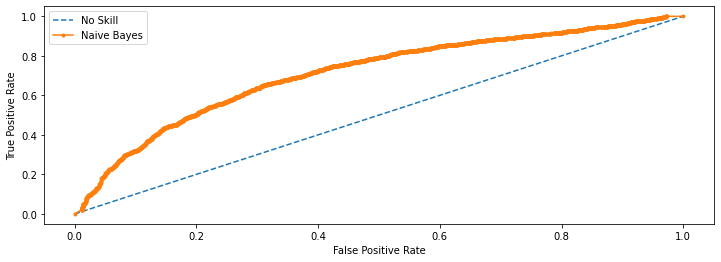

In [318]:
# ROC Curve
plot_ROC(x_test_norm, nb_proba, y_test, 'Naive Bayes')

In [292]:
y_pred_nb = nb.predict(x_test_norm)
confusion_matrix(y_test, y_pred_nb)

array([[ 376,  907],
       [ 818, 6385]], dtype=int64)

In [293]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.31      0.29      0.30      1283
           1       0.88      0.89      0.88      7203

    accuracy                           0.80      8486
   macro avg       0.60      0.59      0.59      8486
weighted avg       0.79      0.80      0.79      8486



In [298]:
# Accuracy -> 80%

In [299]:
# Logistic regression

In [300]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
logistic = LogisticRegression()
logistic.fit(x_train_norm, y_train)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [301]:
logistic_proba = logistic.predict_proba(x_test_norm)

No Skill: ROC AUC=0.500
Logistic regression ROC AUC=0.865


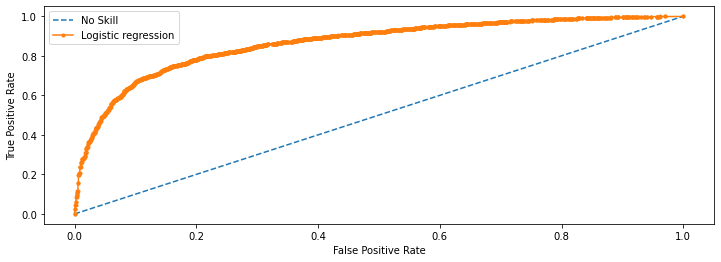

In [317]:
# ROC Curve
plot_ROC(x_test_norm, logistic_proba, y_test, 'Logistic regression')

In [303]:
y_pred_logistic = logistic.predict(x_test_norm)
confusion_matrix(y_test, y_pred_logistic)

array([[ 406,  877],
       [ 241, 6962]], dtype=int64)

In [304]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.63      0.32      0.42      1283
           1       0.89      0.97      0.93      7203

    accuracy                           0.87      8486
   macro avg       0.76      0.64      0.67      8486
weighted avg       0.85      0.87      0.85      8486



In [312]:
# We have about 87% of accuracy

In [357]:
# Decision tree

In [356]:
from sklearn import tree
decisionTree_model = tree.DecisionTreeClassifier()
decisionTree_model.fit(x_train_norm, y_train)

DecisionTreeClassifier()

In [358]:
tree_proba = decisionTree_model.predict_proba(x_test_norm)

No Skill: ROC AUC=0.500
Decision tree ROC AUC=0.661


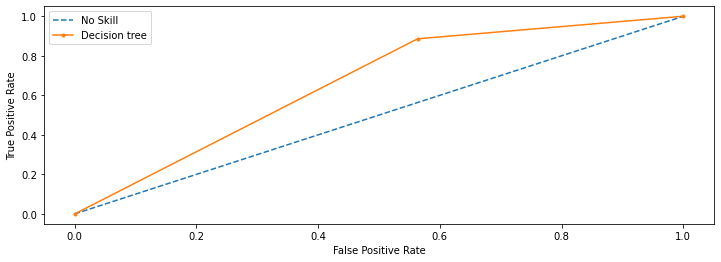

In [359]:
# ROC
plot_ROC(x_test_norm, tree_proba, y_test, 'Decision tree')

In [360]:
y_pred_tree = decisionTree_model.predict(x_test_norm)
confusion_matrix(y_test, y_pred_tree)

array([[ 560,  723],
       [ 822, 6381]], dtype=int64)

In [361]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.41      0.44      0.42      1283
           1       0.90      0.89      0.89      7203

    accuracy                           0.82      8486
   macro avg       0.65      0.66      0.66      8486
weighted avg       0.82      0.82      0.82      8486



In [313]:
# Random forest

In [314]:
from sklearn.ensemble import RandomForestClassifier

# Create a model and train it
RandomForest_model = RandomForestClassifier()
RandomForest_model.fit(x_train_norm, y_train)

RandomForestClassifier()

In [315]:
forest_proba = RandomForest_model.predict_proba(x_test_norm)

No Skill: ROC AUC=0.500
Random Forest ROC AUC=0.867


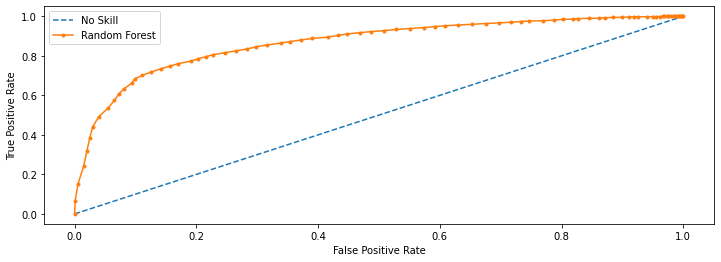

In [319]:
# ROC
plot_ROC(x_test_norm, forest_proba, y_test, 'Random Forest')

In [320]:
y_pred_forest = RandomForest_model.predict(x_test_norm)
confusion_matrix(y_test, y_pred_forest)

array([[ 295,  988],
       [ 164, 7039]], dtype=int64)

In [321]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.64      0.23      0.34      1283
           1       0.88      0.98      0.92      7203

    accuracy                           0.86      8486
   macro avg       0.76      0.60      0.63      8486
weighted avg       0.84      0.86      0.84      8486



In [322]:
# 86%, but recall value is really low

In [325]:
from sklearn.ensemble import AdaBoostClassifier

In [327]:
Ada_model = AdaBoostClassifier()
Ada_model.fit(x_train_norm, y_train)

AdaBoostClassifier()

In [328]:
ada_proba = Ada_model.predict_proba(x_test_norm)

No Skill: ROC AUC=0.500
AdaBoost Classifier ROC AUC=0.866


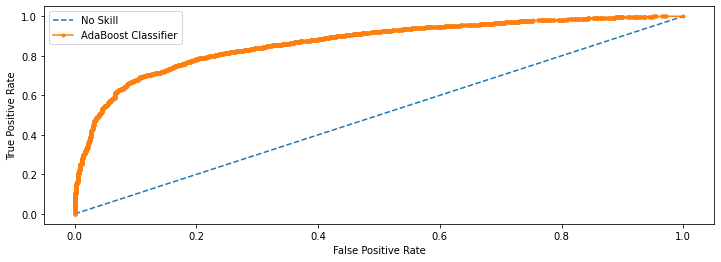

In [329]:
# ROC
plot_ROC(x_test_norm, ada_proba, y_test, 'AdaBoost Classifier')

In [330]:
y_pred_Ada = Ada_model.predict(x_test_norm)
confusion_matrix(y_test, y_pred_Ada)

array([[ 417,  866],
       [ 288, 6915]], dtype=int64)

In [331]:
print(classification_report(y_test, y_pred_Ada))

              precision    recall  f1-score   support

           0       0.59      0.33      0.42      1283
           1       0.89      0.96      0.92      7203

    accuracy                           0.86      8486
   macro avg       0.74      0.64      0.67      8486
weighted avg       0.84      0.86      0.85      8486



In [342]:
# PCA

In [343]:
# Shape before PCA
x_train_norm.shape

(33942, 96)

In [344]:
# Let's compress columns to 20 

In [345]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)

In [346]:
x_train_norm_PCA = pca.fit_transform(x_train_norm) 
x_test_norm_PCA = pca.transform(x_test_norm)

In [347]:
x_train_norm_PCA.shape

(33942, 20)

In [348]:
# Naive Bayes PCA

In [349]:
nb_PCA = GaussianNB()
nb_PCA.fit(x_train_norm_PCA, y_train)
y_pred_nb_PCA = nb_PCA.predict(x_test_norm_PCA)
print(confusion_matrix(y_test, y_pred_nb_PCA))
print(classification_report(y_test, y_pred_nb_PCA))

[[ 196 1087]
 [ 537 6666]]
              precision    recall  f1-score   support

           0       0.27      0.15      0.19      1283
           1       0.86      0.93      0.89      7203

    accuracy                           0.81      8486
   macro avg       0.56      0.54      0.54      8486
weighted avg       0.77      0.81      0.79      8486



In [350]:
# Logistic regression PCA

In [351]:
logistic_PCA = LogisticRegression()
logistic_PCA.fit(x_train_norm_PCA, y_train)
y_pred_logistic_PCA = logistic_PCA.predict(x_test_norm_PCA)
print(confusion_matrix(y_test, y_pred_logistic_PCA))
print(classification_report(y_test, y_pred_logistic_PCA))

[[   2 1281]
 [   4 7199]]
              precision    recall  f1-score   support

           0       0.33      0.00      0.00      1283
           1       0.85      1.00      0.92      7203

    accuracy                           0.85      8486
   macro avg       0.59      0.50      0.46      8486
weighted avg       0.77      0.85      0.78      8486



In [352]:
# Decision tree PCA

In [362]:
decisionTree_model_PCA = tree.DecisionTreeClassifier()
decisionTree_model_PCA.fit(x_train_norm_PCA, y_train)
y_pred_tree_PCA = decisionTree_model_PCA.predict(x_test_norm_PCA)
print(confusion_matrix(y_test, y_pred_tree_PCA))
print(classification_report(y_test, y_pred_tree_PCA))

[[ 295  988]
 [1160 6043]]
              precision    recall  f1-score   support

           0       0.20      0.23      0.22      1283
           1       0.86      0.84      0.85      7203

    accuracy                           0.75      8486
   macro avg       0.53      0.53      0.53      8486
weighted avg       0.76      0.75      0.75      8486



In [363]:
# AdaBoost PCA

In [364]:
Ada_model_PCA = tree.DecisionTreeClassifier()
Ada_model_PCA.fit(x_train_norm_PCA, y_train)
y_pred_tree_Ada = Ada_model_PCA.predict(x_test_norm_PCA)
print(confusion_matrix(y_test, y_pred_tree_Ada))
print(classification_report(y_test, y_pred_tree_Ada))

[[ 273 1010]
 [1156 6047]]
              precision    recall  f1-score   support

           0       0.19      0.21      0.20      1283
           1       0.86      0.84      0.85      7203

    accuracy                           0.74      8486
   macro avg       0.52      0.53      0.52      8486
weighted avg       0.76      0.74      0.75      8486



In [365]:
# In general - PCA do not help to improve our accuracy. LogisticRegression accuracy was really high, but 
# recall was equal 0.

In [366]:
# Final model - decision tree- tune up a parameters

In [437]:
final_model = tree.DecisionTreeClassifier(
    criterion = 'gini',
    splitter = 'best',
    max_depth = 40,
    min_samples_split = 10
)

In [438]:
# Train best model
final_model.fit(x_train_norm, y_train)

DecisionTreeClassifier(max_depth=40, min_samples_split=10)

In [439]:
y_pred_final_model = final_model.predict(x_test_norm)

In [440]:
final_model_proba = final_model.predict_proba(x_test_norm)

No Skill: ROC AUC=0.500
FINAL Decision Tree Classifier ROC AUC=0.692


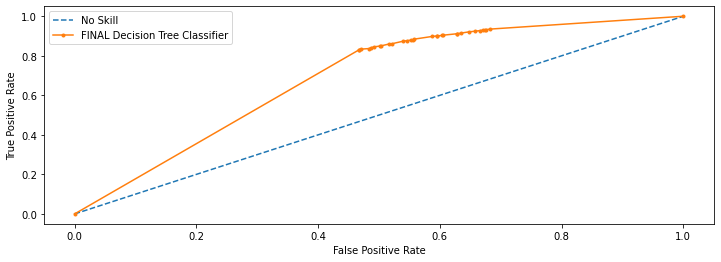

In [441]:
# ROC
plot_ROC(x_test_norm, final_model_proba, y_test, 'FINAL Decision Tree Classifier')

In [442]:
print(confusion_matrix(y_test, y_pred_final_model))

[[ 568  715]
 [ 836 6367]]


In [443]:
print(classification_report(y_test, y_pred_final_model))

              precision    recall  f1-score   support

           0       0.40      0.44      0.42      1283
           1       0.90      0.88      0.89      7203

    accuracy                           0.82      8486
   macro avg       0.65      0.66      0.66      8486
weighted avg       0.82      0.82      0.82      8486



In [444]:
# 82% of accuracy

In [445]:
# Cross validaltion
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [446]:
kfold = KFold(n_splits=10)

In [448]:
result = cross_val_score(final_model, X_min_max, Y, cv=kfold)

In [449]:
print("Accuracy with cross validation", result.mean())

Accuracy with cross validation 0.8210121715851596


In [450]:
# Cross validation accuracy was really simialar.

In [451]:
# The best model turned out to be the decision tree model. The selection of hyperparameters allowed to improve 
# the quality of the selected model. ROC curves proved to be a very useful tool, which, in the case of binary 
# classification, made it possible to assess the quality of model learning. 